#### The dataset contains informations on patients with lung cancer, including their :

**Age** : The age of the patient.

**Gender** : The gender of the patient.

**Air pollution exposure** : The level of air pollution exposure of the patient.

**Alcohol use** : The level of alcohol use of the patient.

**Dust allergy** : The level of dust allergy of the patient. 

**Occupational hazards** : The level of occupational hazards of the patient.

**Genetic risk** : The level of genetic risk of the patient. 

**Chronic lung disease** : The level of chronic lung disease of the patient.  

**Balanced diet** : The level of balanced diet of the patient.  

**Obesity** : The level of obesity of the patient.

**Smoking** : The level of smoking of the patient.

**Passive smoker** : The level of passive smoker of the patient.

**Chest pain** : The level of chest pain of the patient.

**Coughing of blood** : The level of coughing of blood of the patient. 

**Fatigue** : The level of fatigue of the patient. 

**Weight loss** : The level of weight loss of the patient. 

**Shortness of breath** : The level of shortness of breath of the patient. 

**Wheezing** : The level of wheezing of the patient. 

**Swallowing difficulty** : The level of swallowing difficulty of the patient.

**Clubbing of finger nails and snoring** : The level of clubbing of finger nails of the patient.

**Frequent Cold** : The level of frequent cold.

**Dry Cough** : The level of dry cough.

**Snoring** : The level of snoring.

**Level** : The level of the disease.

## Importing packages

In [858]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster
import mpl_axes_aligner
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [859]:
path = 'cancer_patient_data_sets.csv'
df = pd.read_csv(path)
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [860]:
data = df.drop(['index','Patient Id'], axis=1)

In [861]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [862]:
data.dtypes

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [863]:
for i in data.columns:
    print(i)

Age
Gender
Air Pollution
Alcohol use
Dust Allergy
OccuPational Hazards
Genetic Risk
chronic Lung Disease
Balanced Diet
Obesity
Smoking
Passive Smoker
Chest Pain
Coughing of Blood
Fatigue
Weight Loss
Shortness of Breath
Wheezing
Swallowing Difficulty
Clubbing of Finger Nails
Frequent Cold
Dry Cough
Snoring
Level


In [864]:
data['Level'] = data['Level'].map({'Low':0, 'Medium':1, 'High':2})

In [865]:
data.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

<AxesSubplot: >

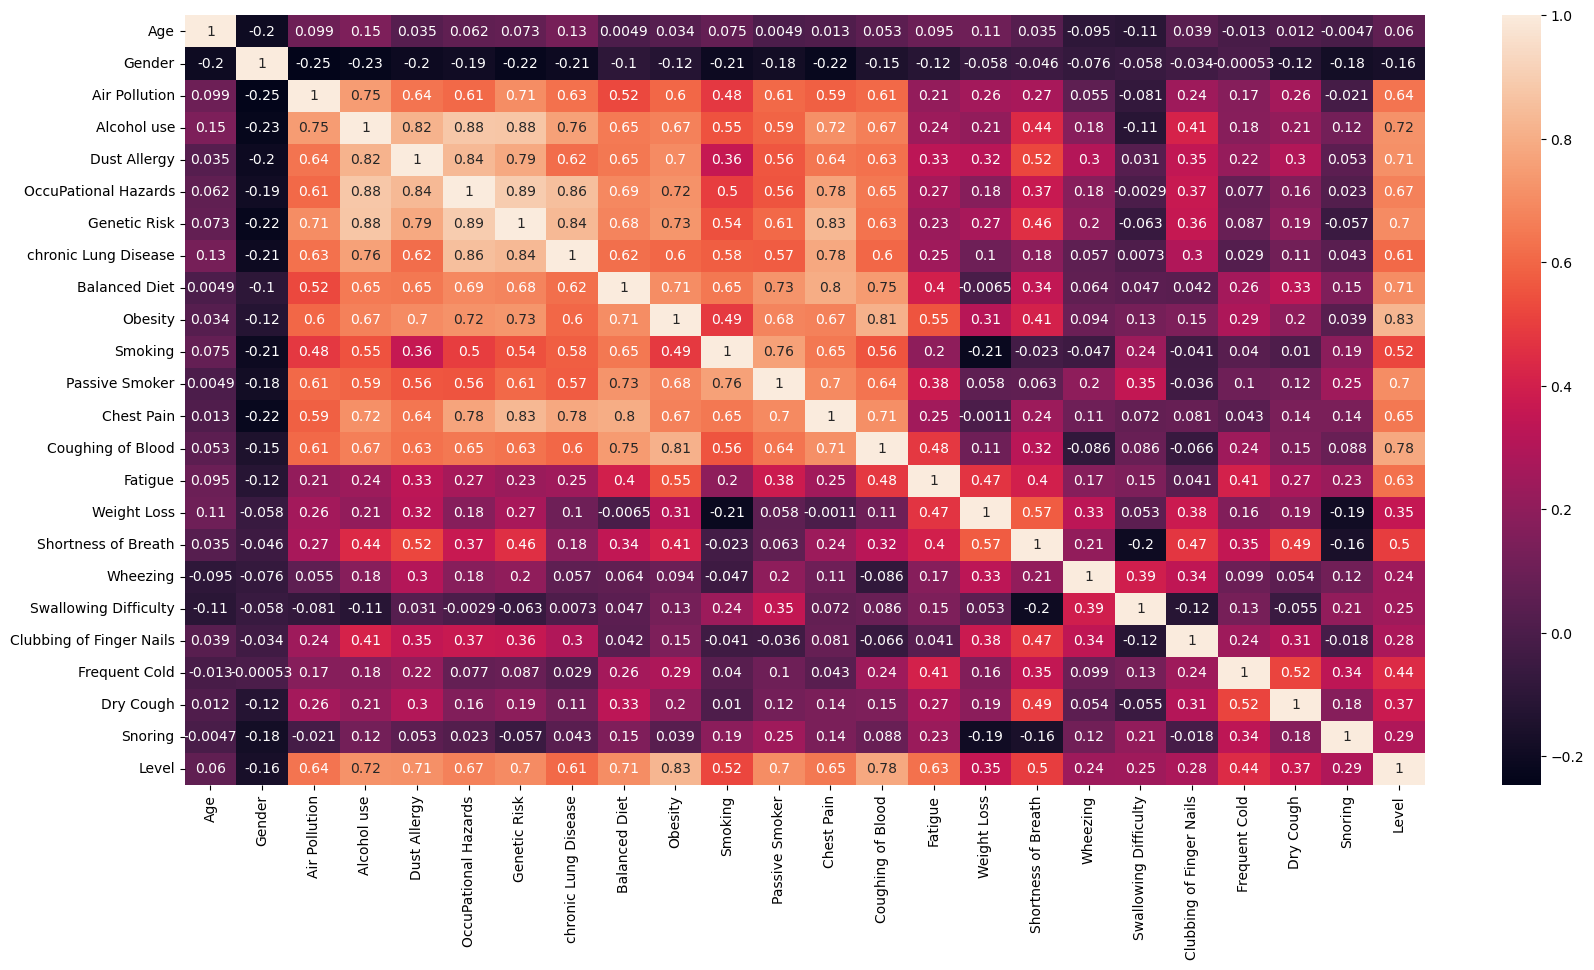

In [866]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

C:\Users\vosco\AppData\Local\Temp\ipykernel_9024\1435798120.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,10))


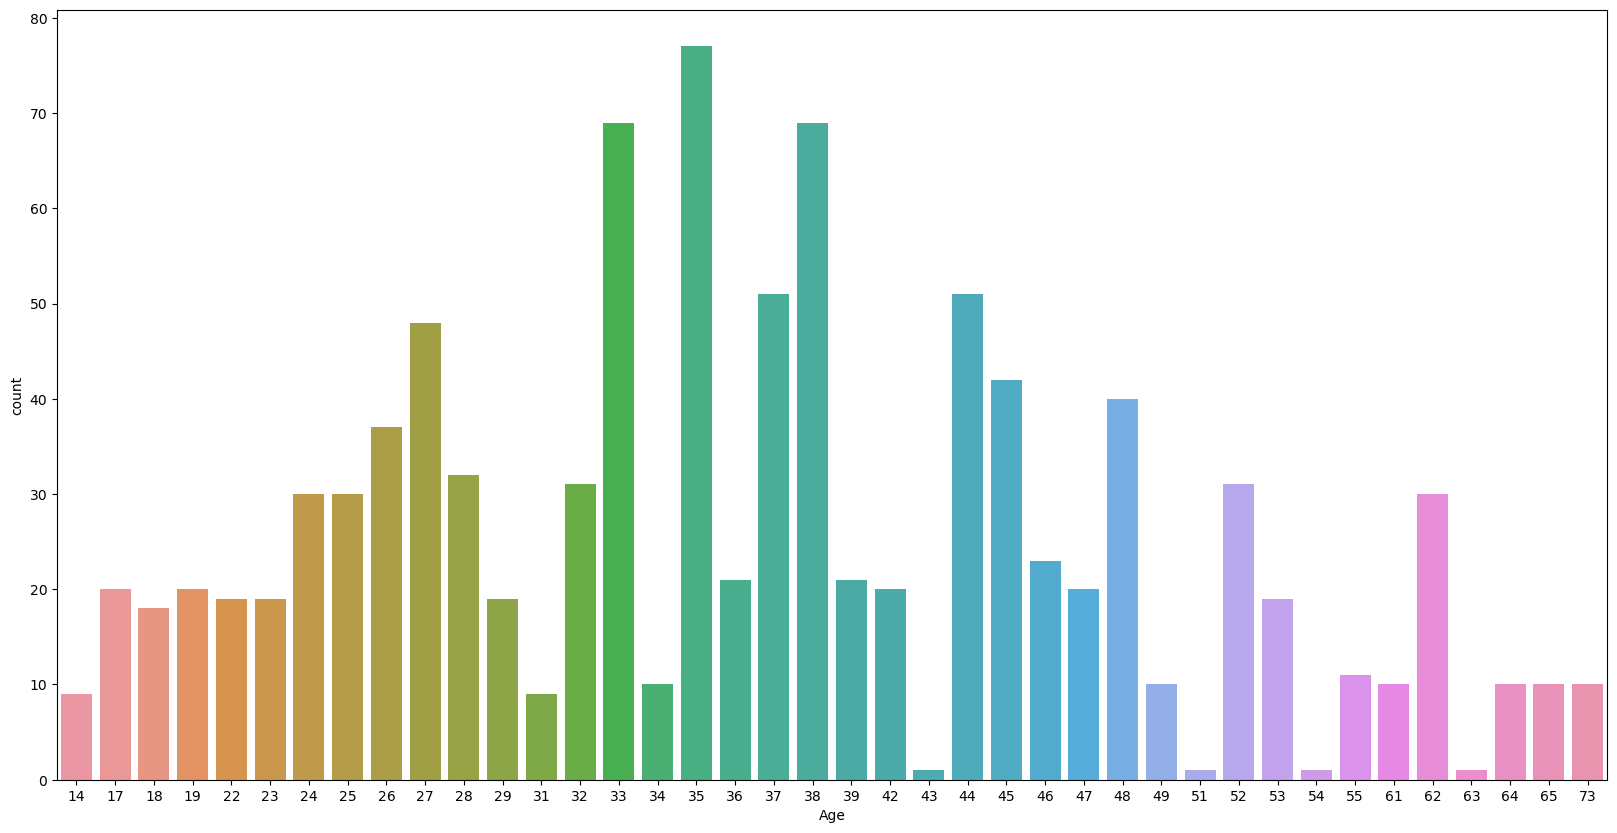

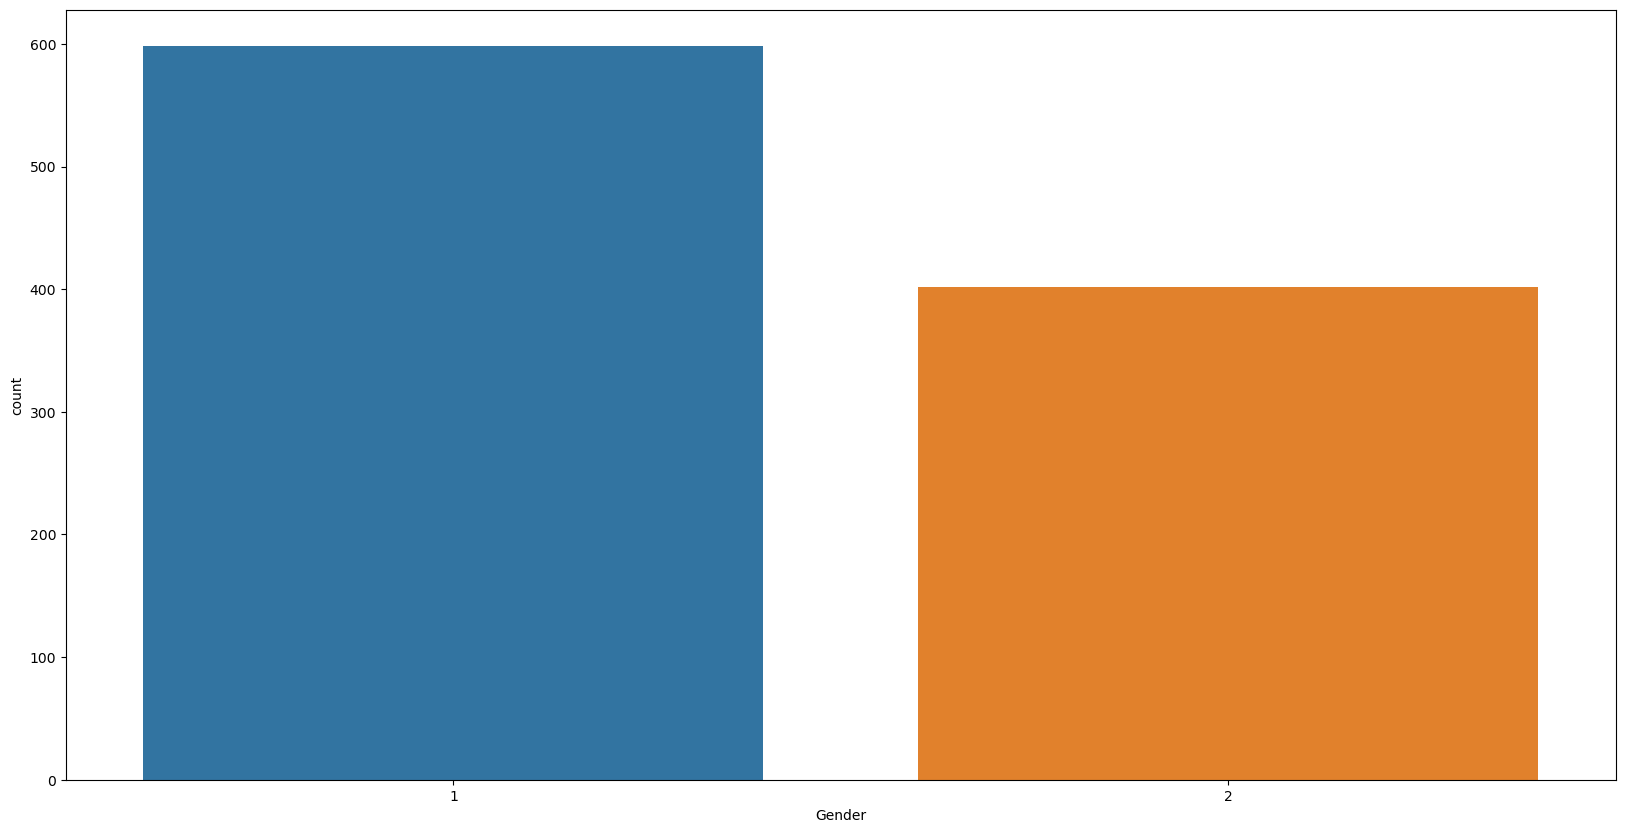

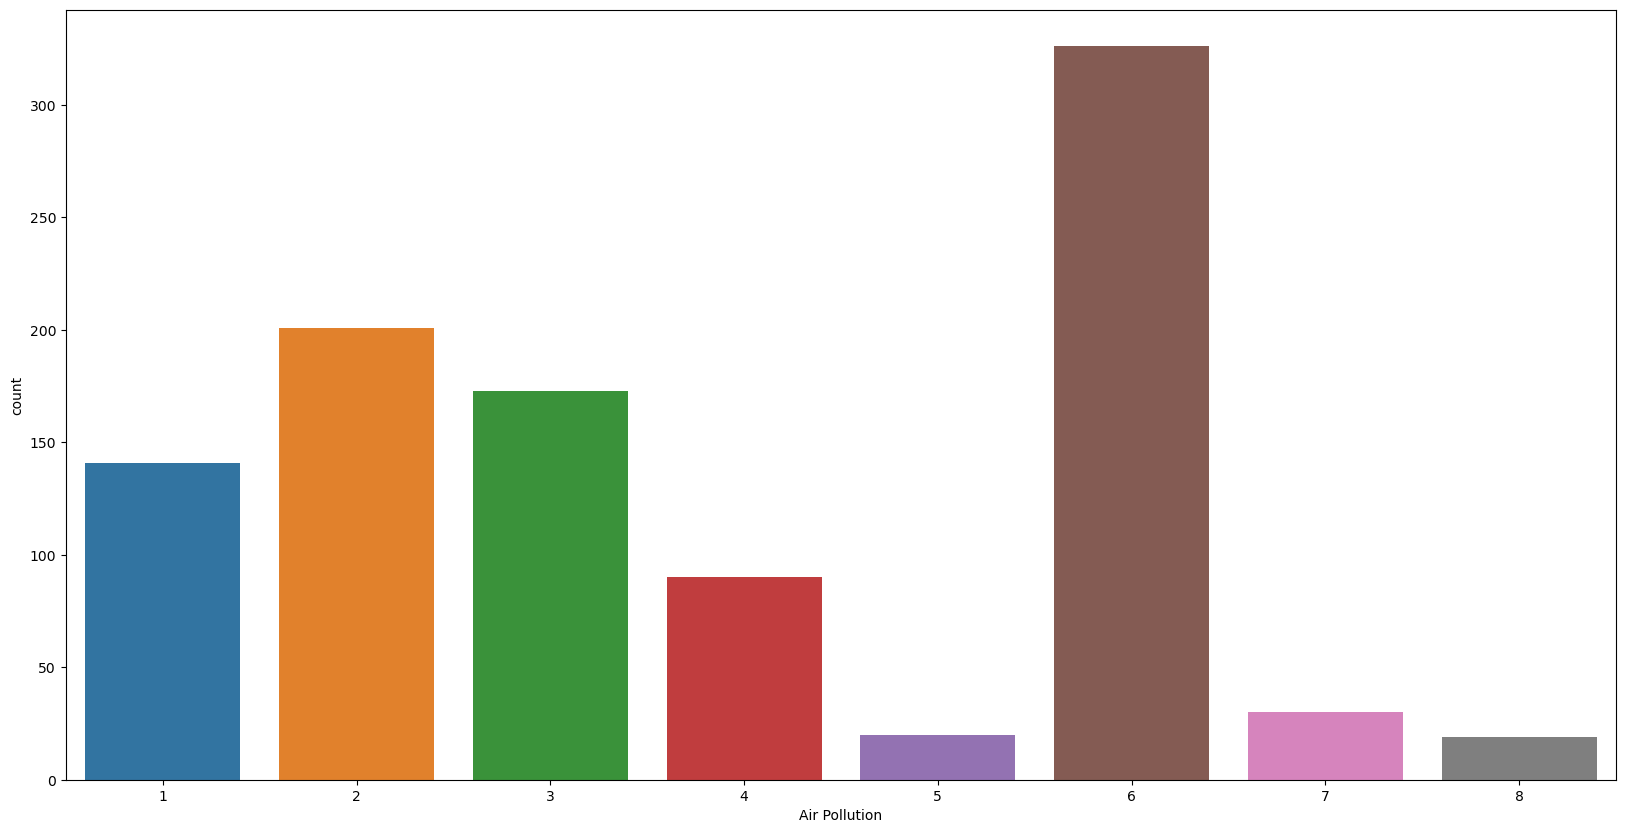

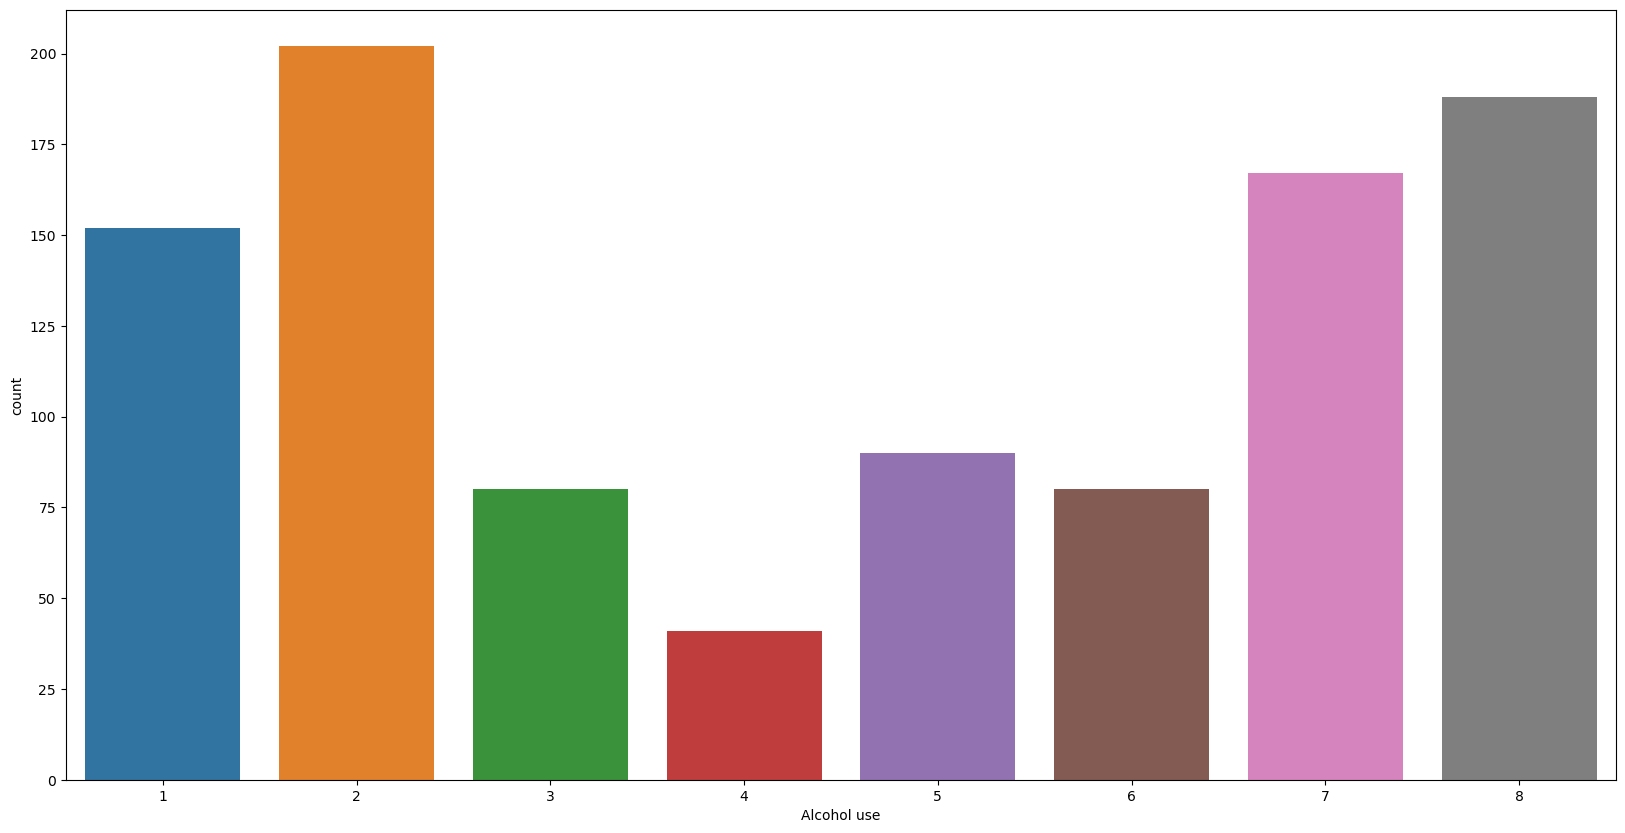

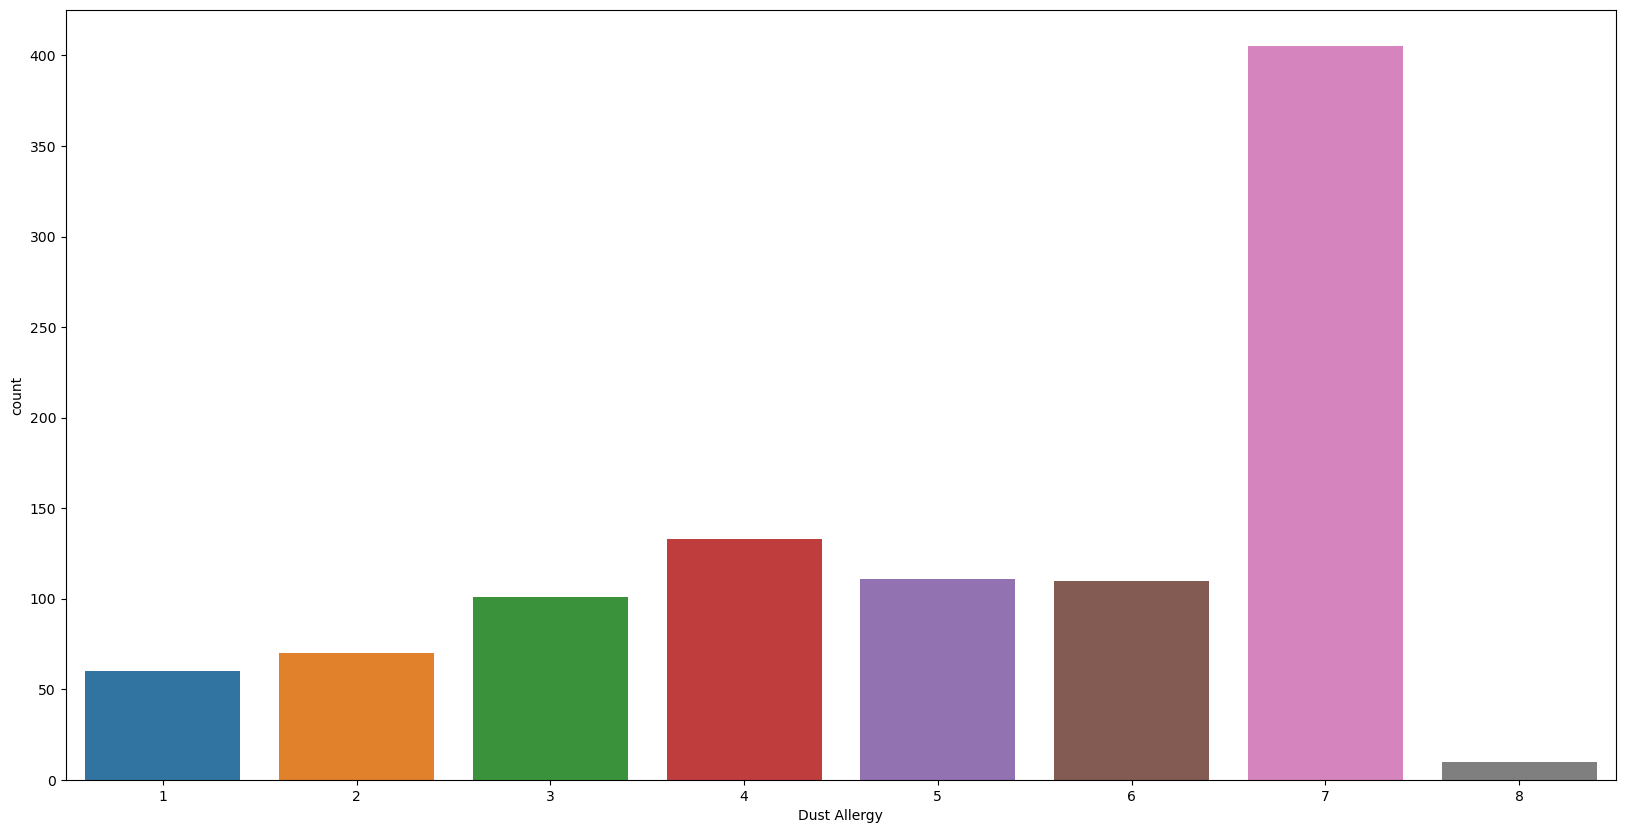

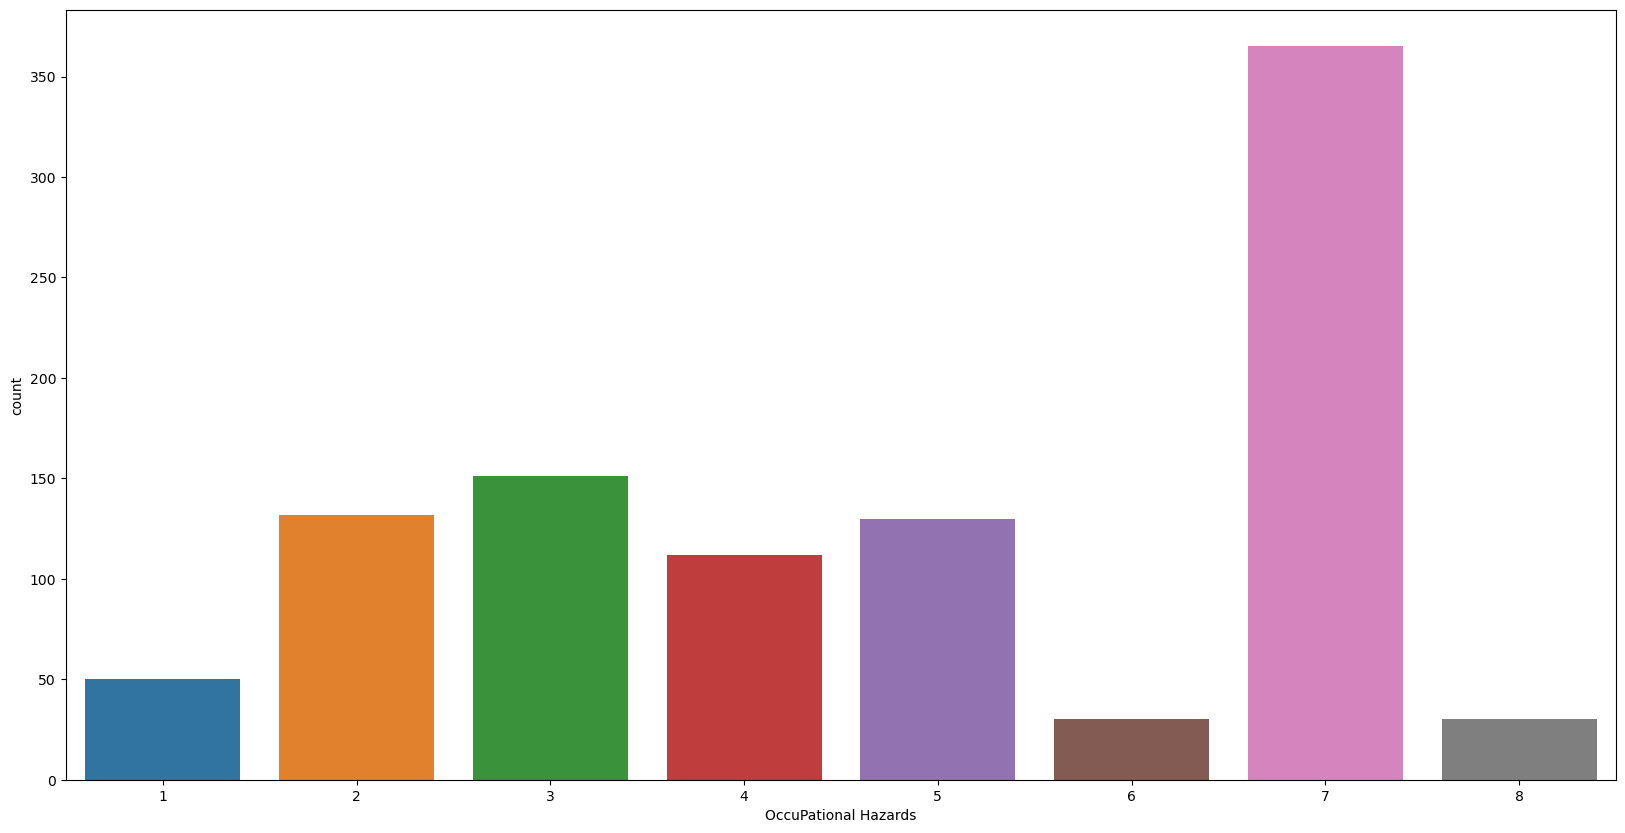

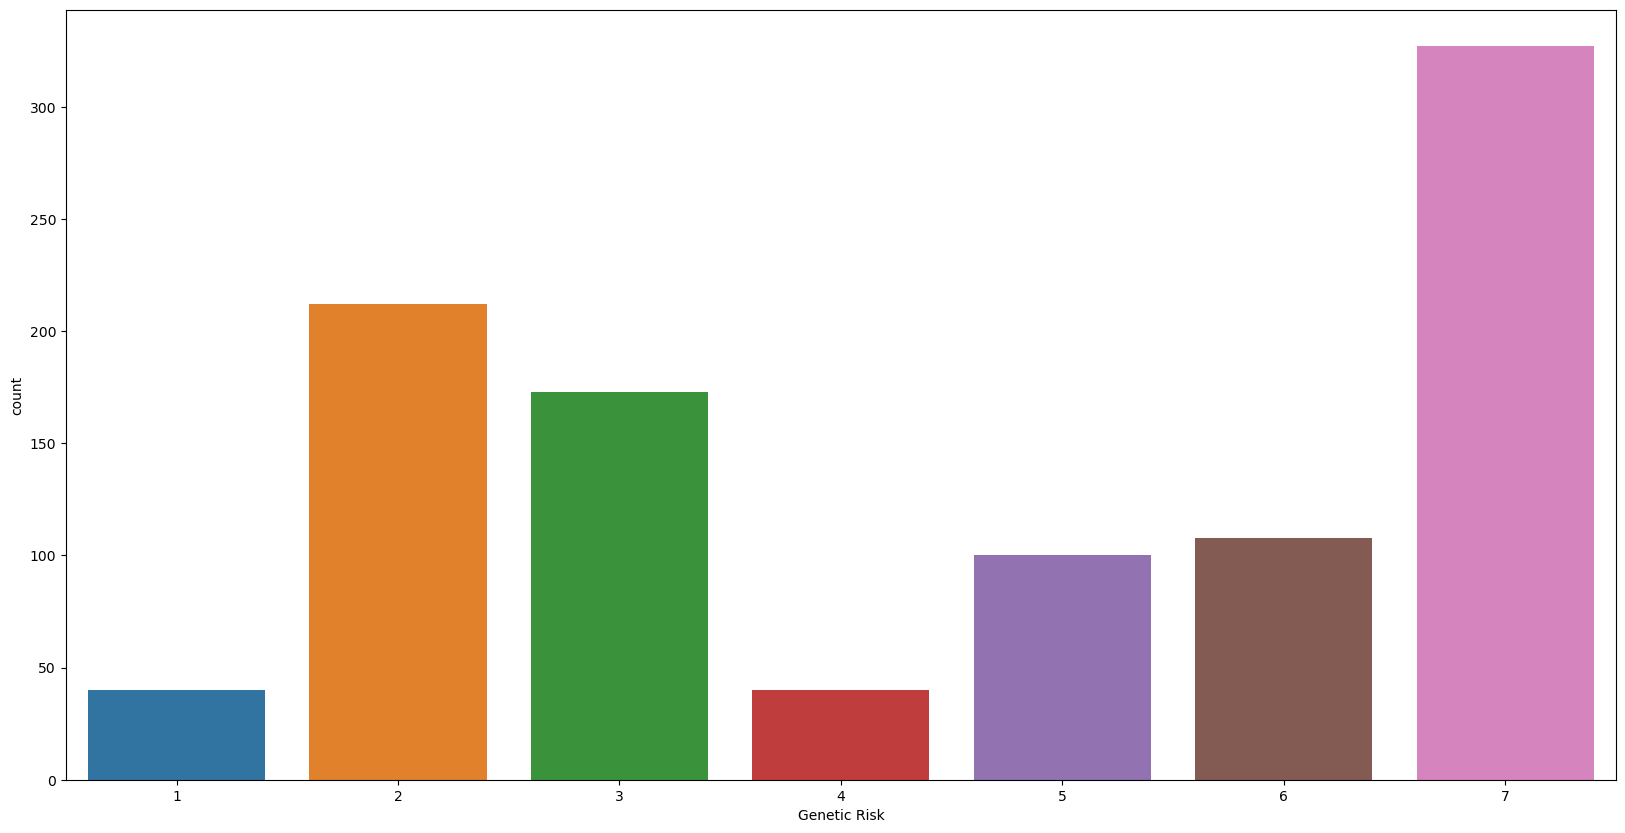

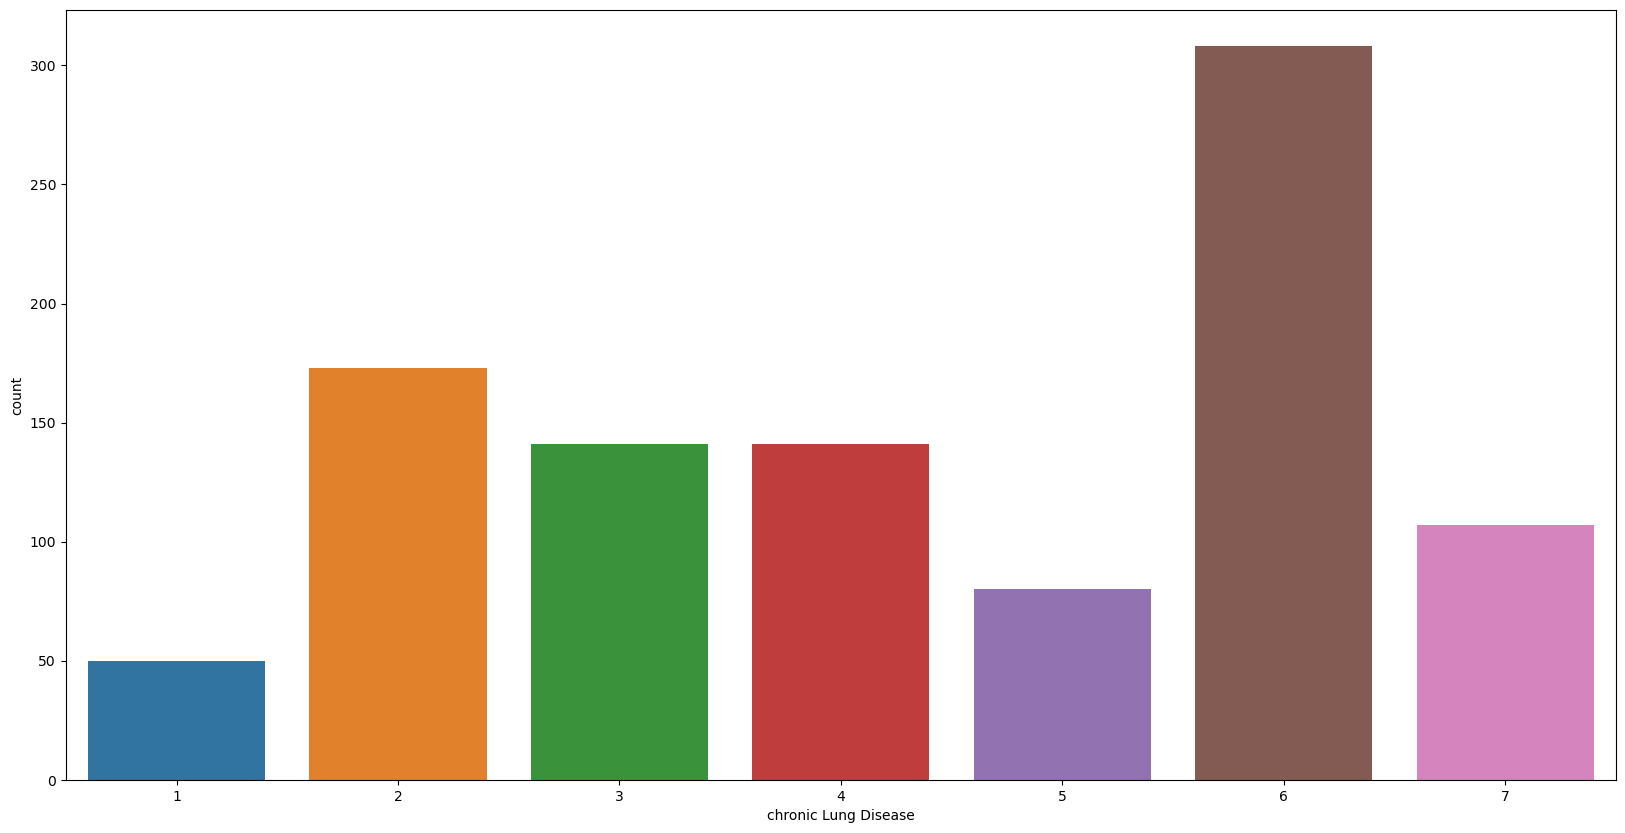

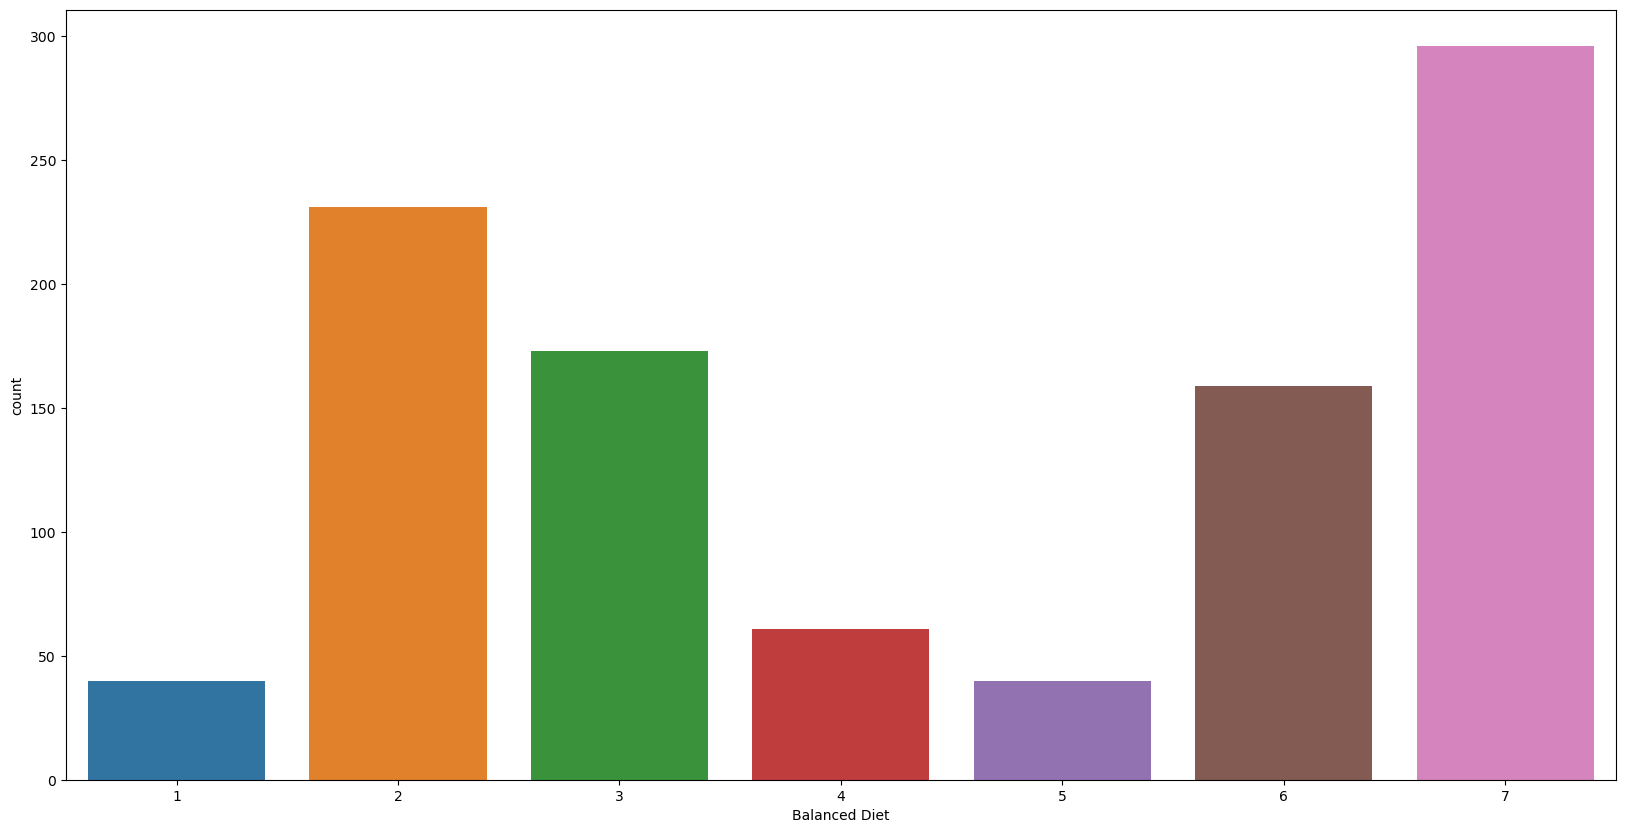

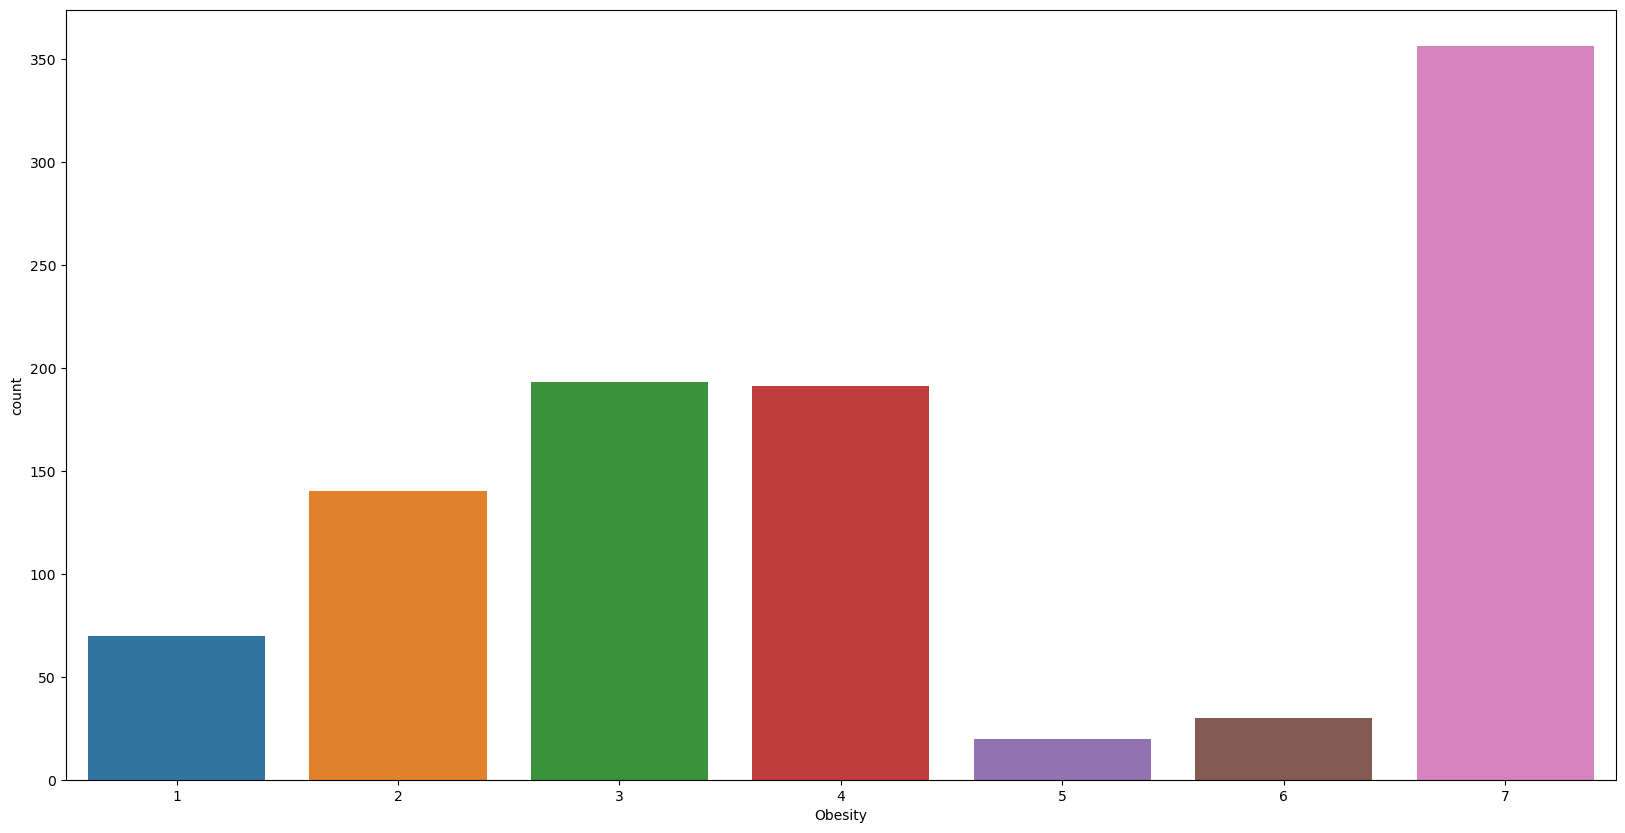

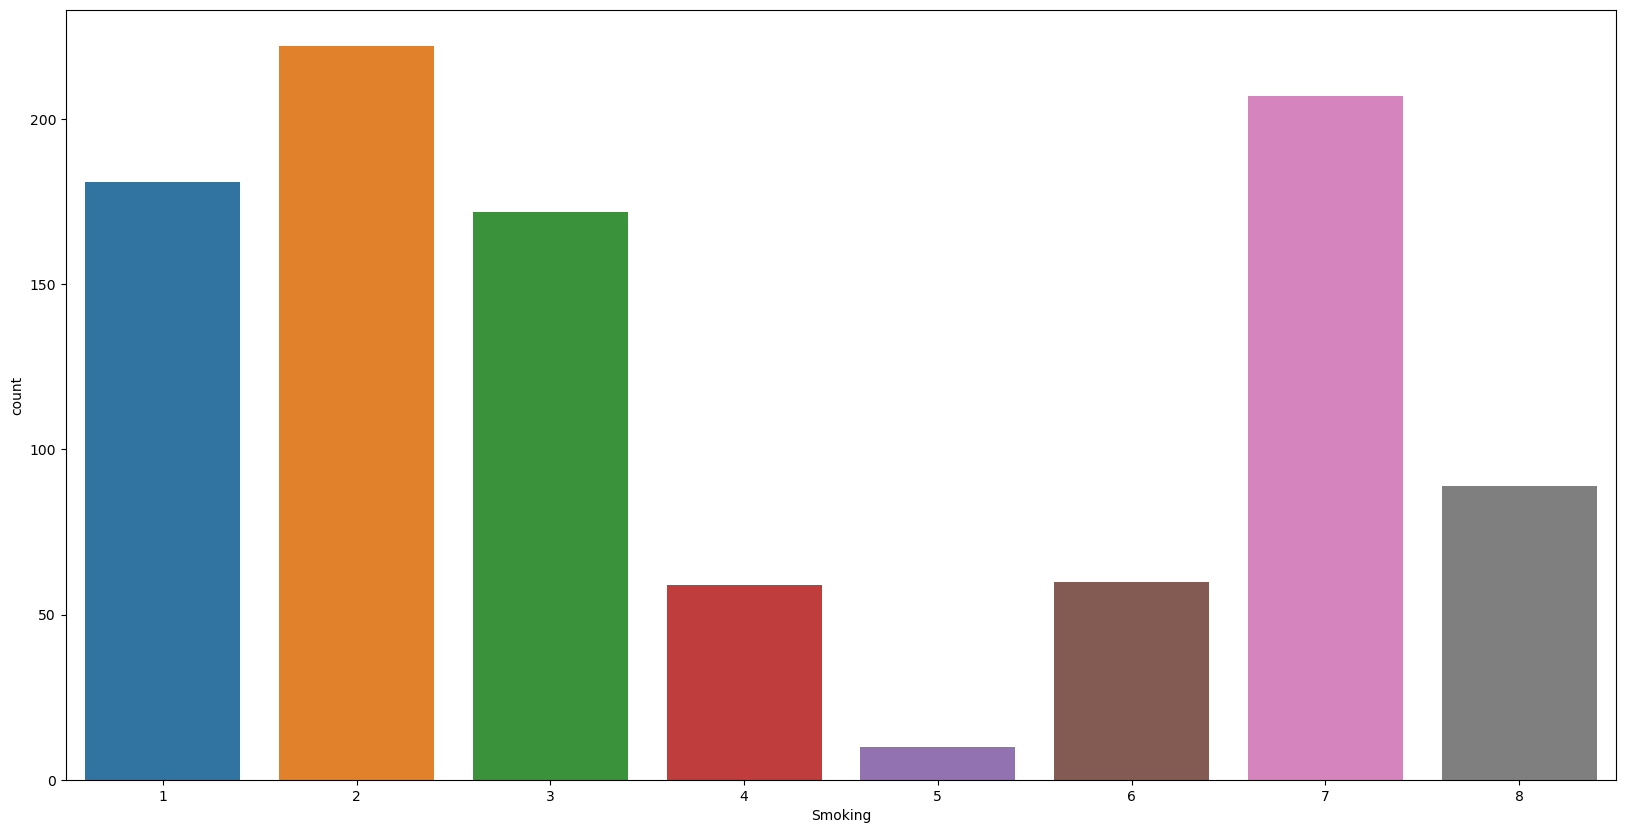

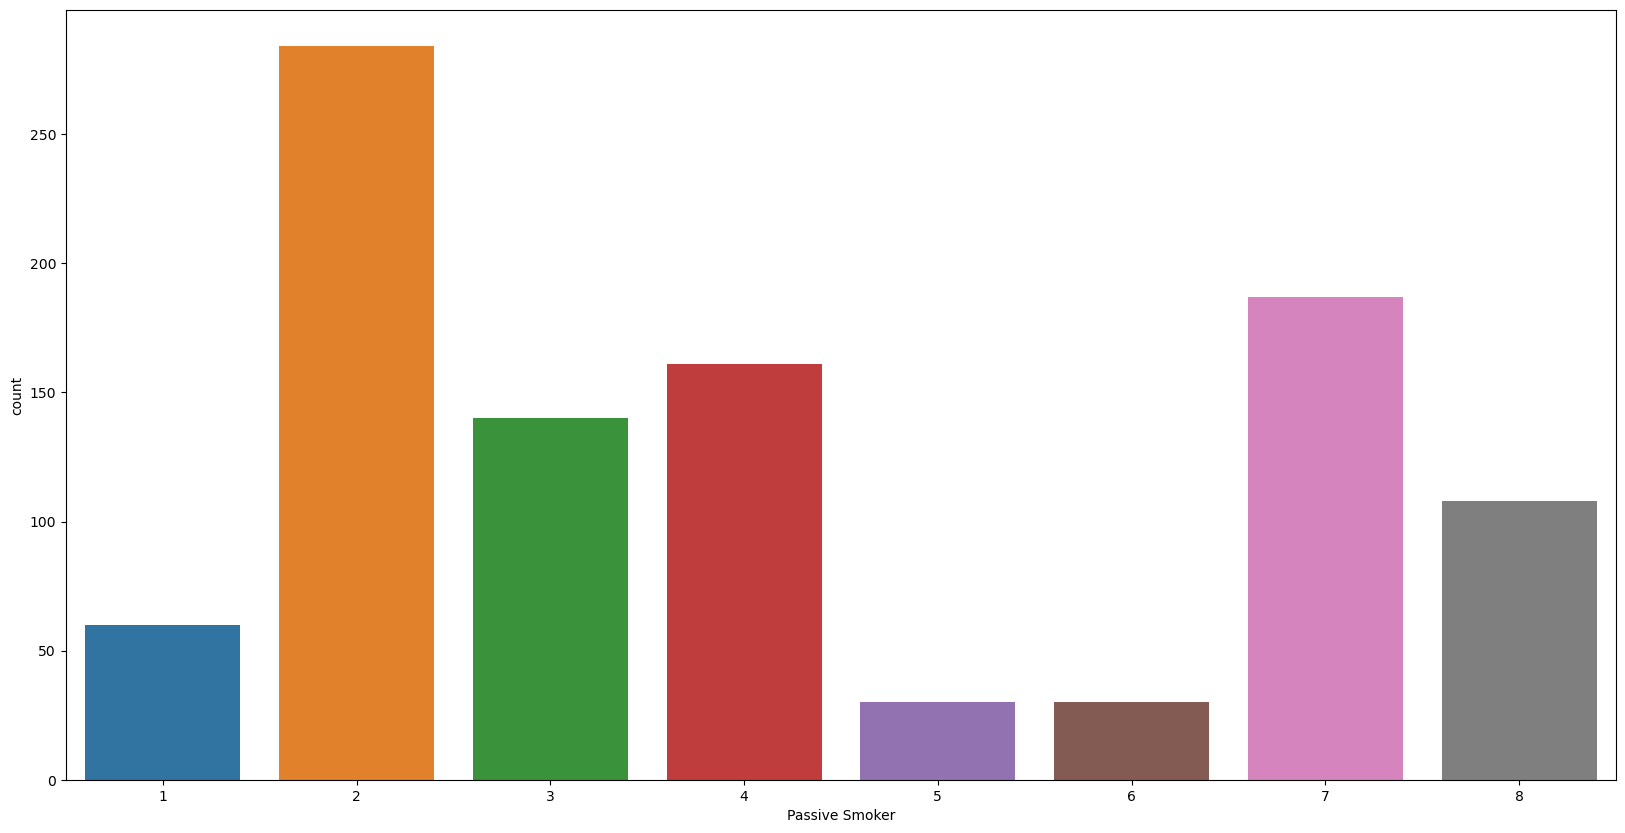

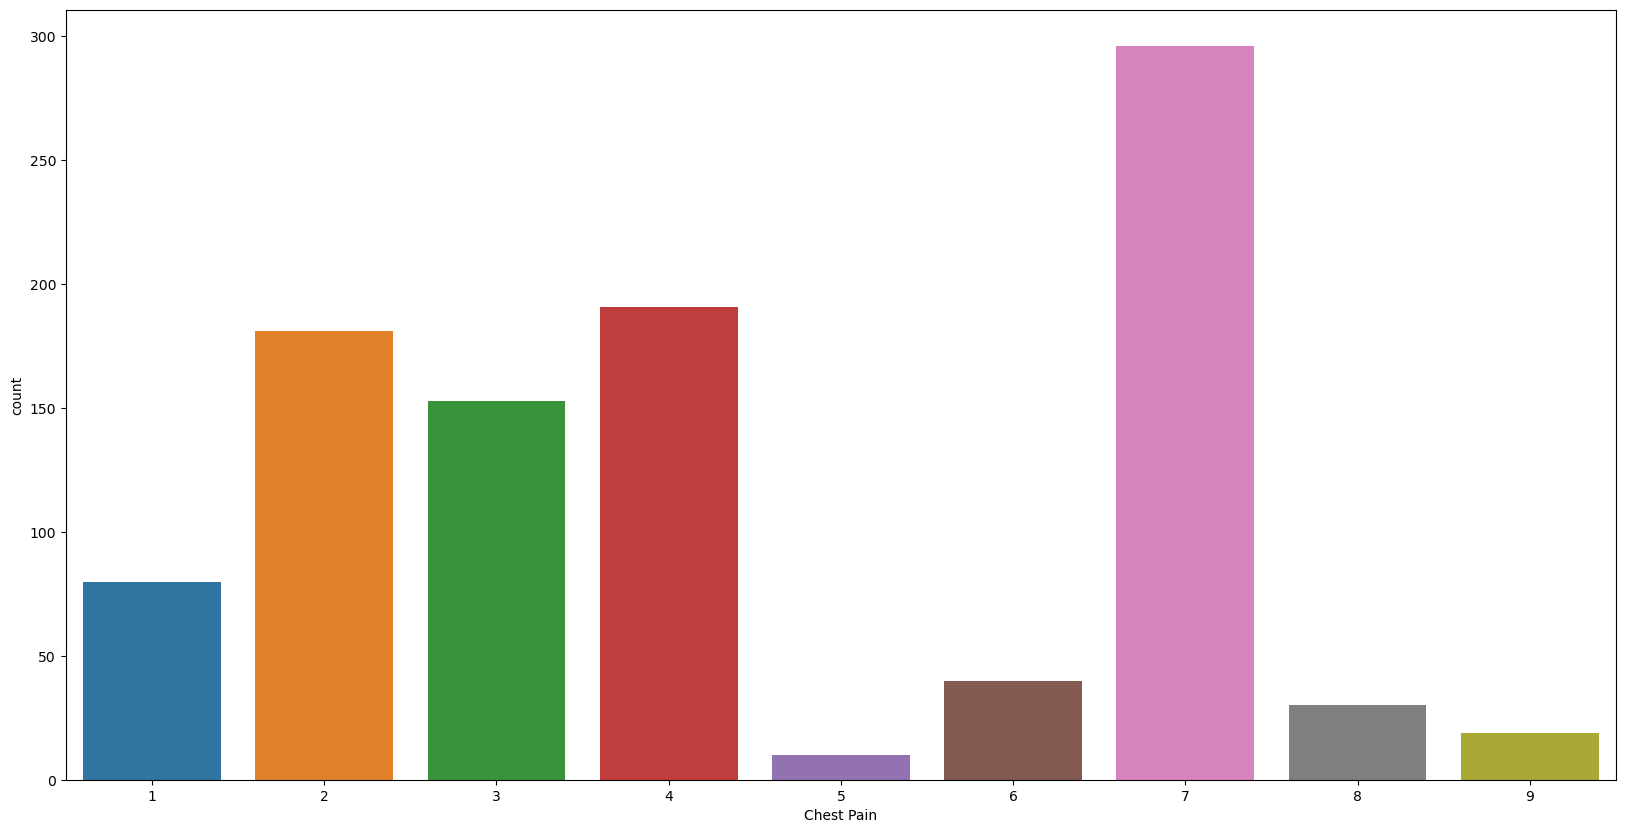

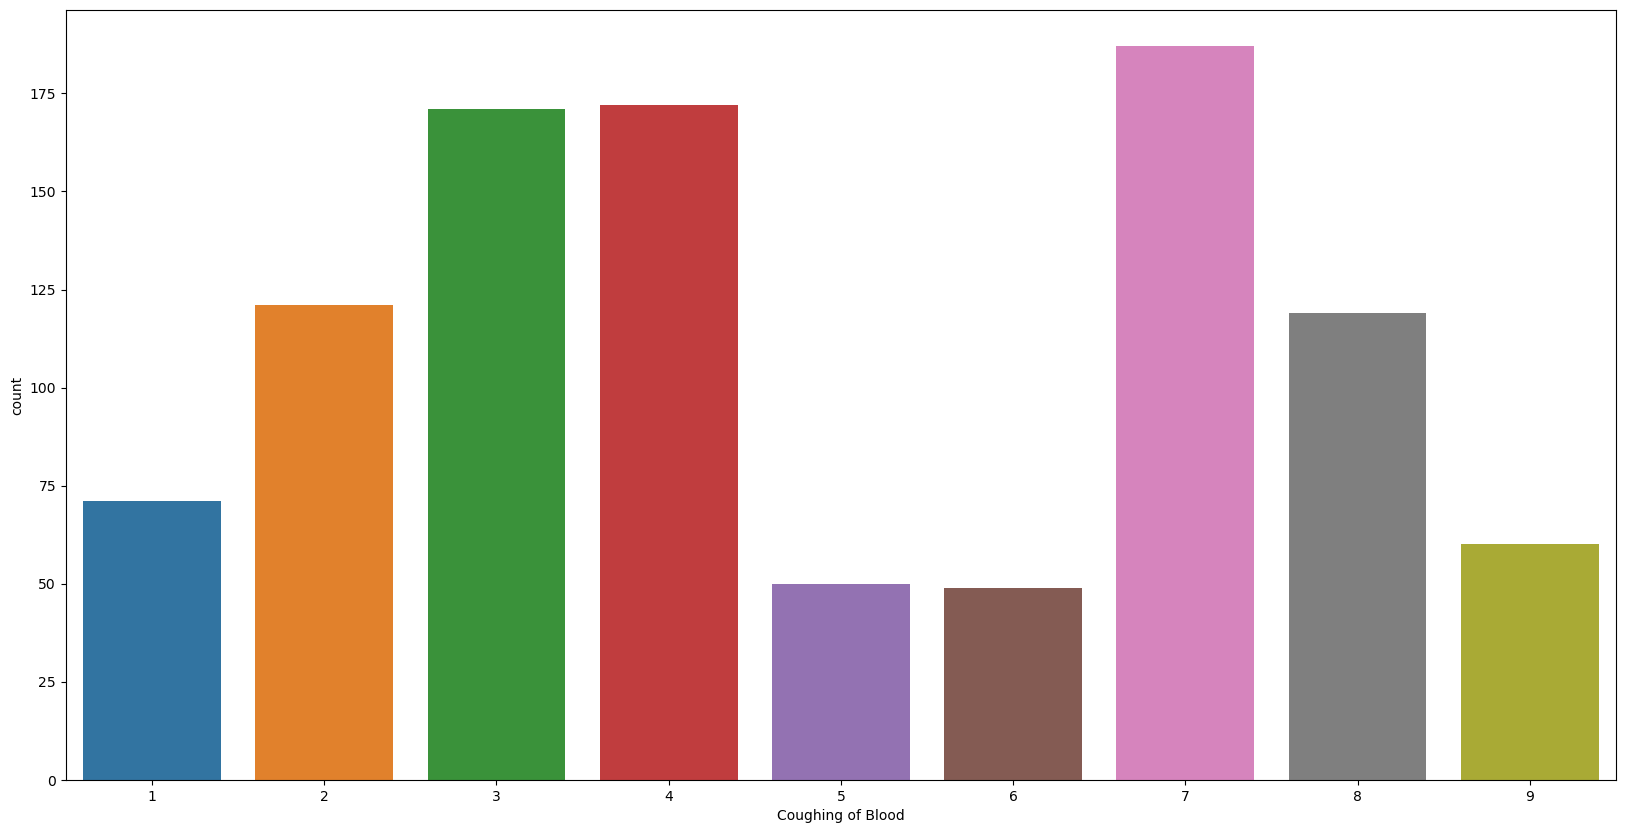

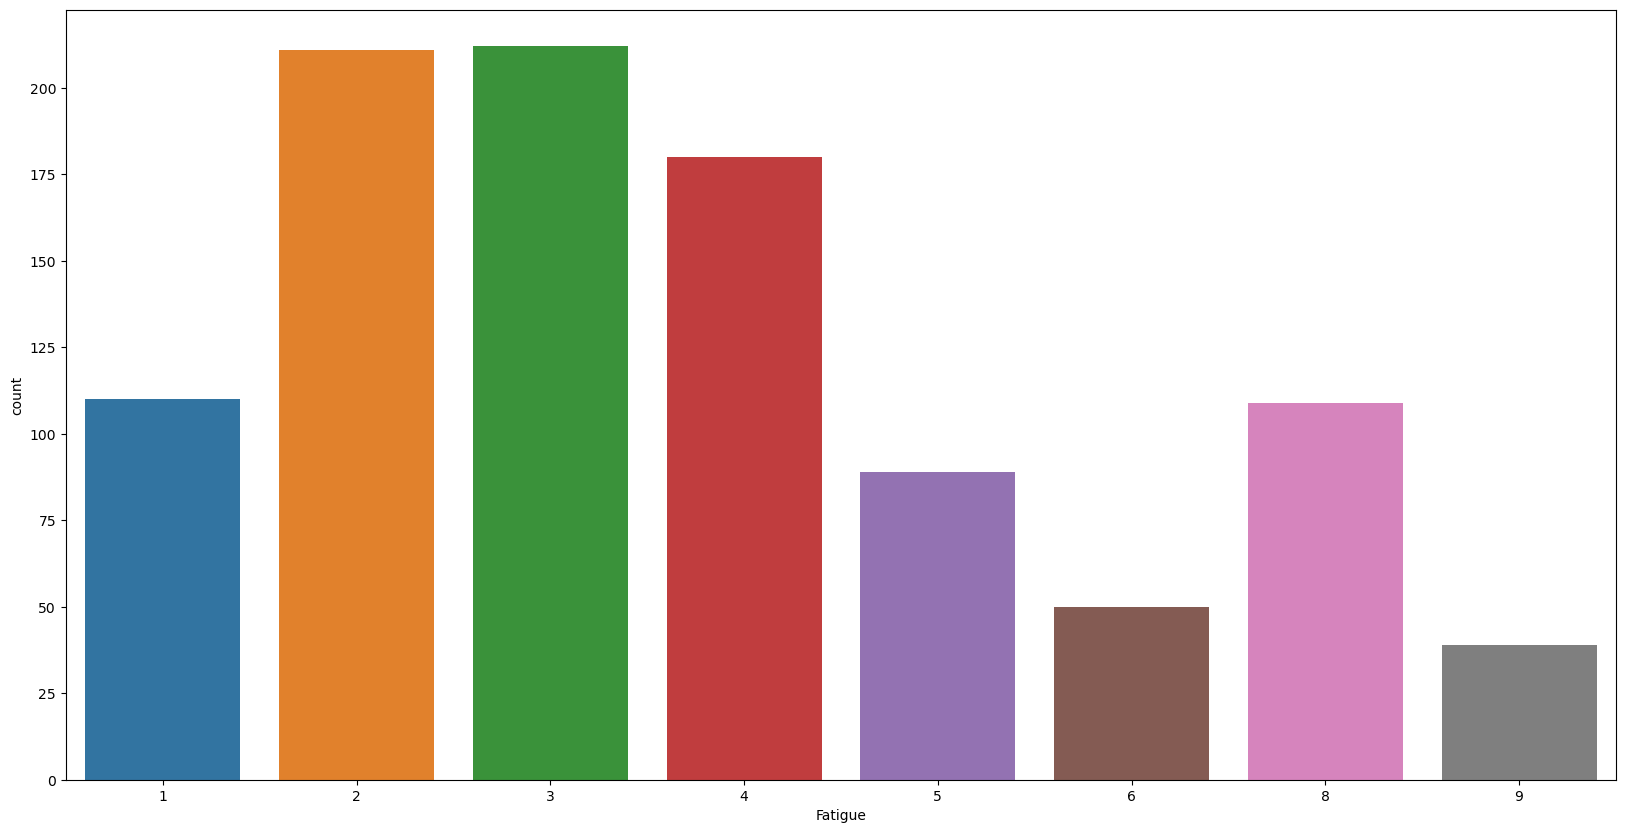

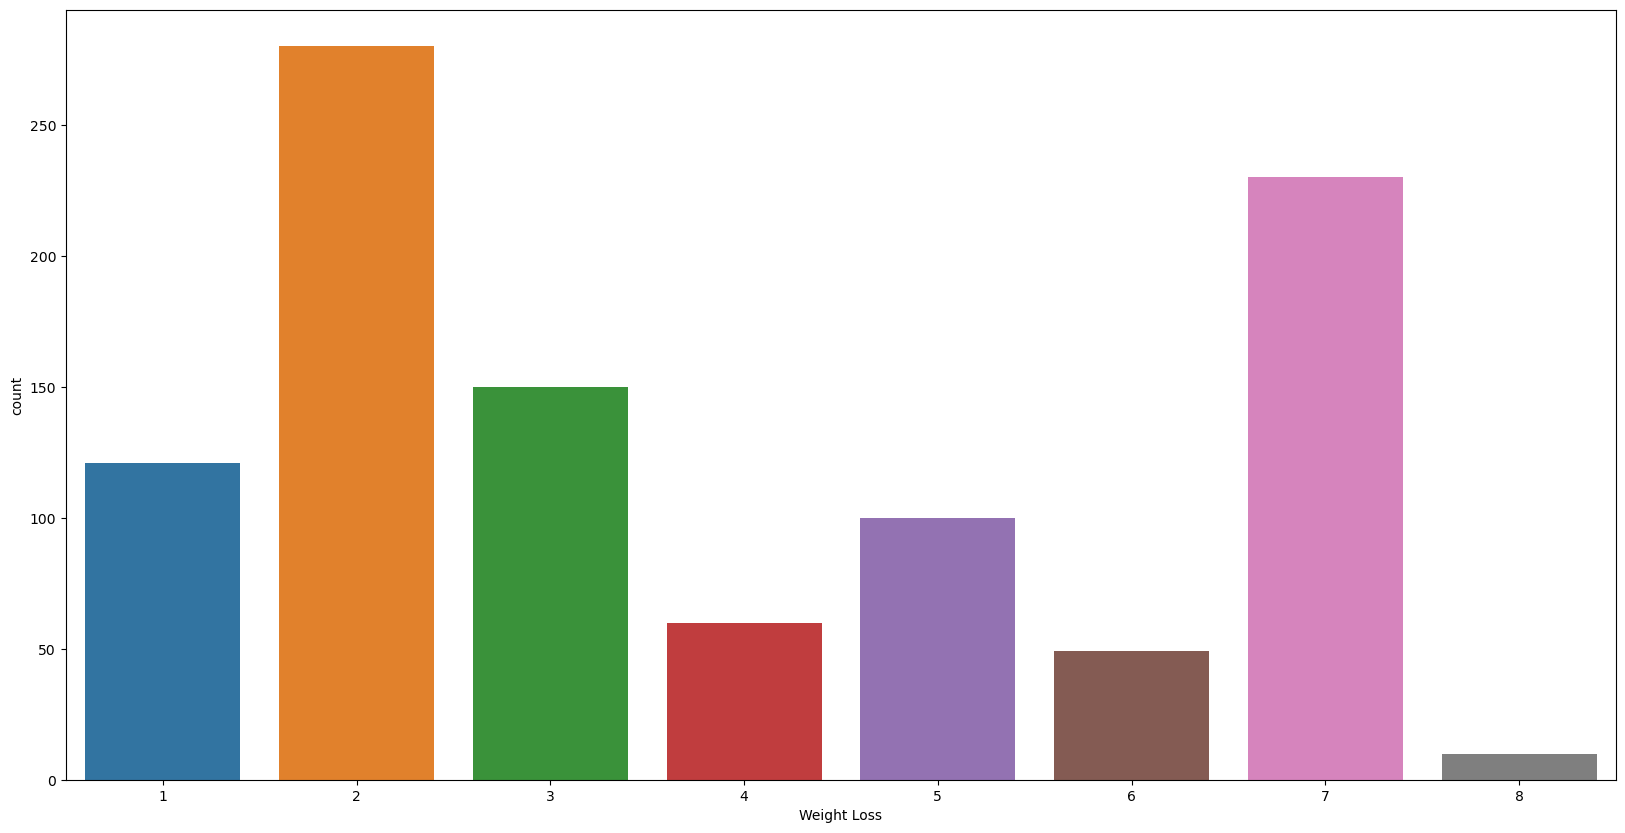

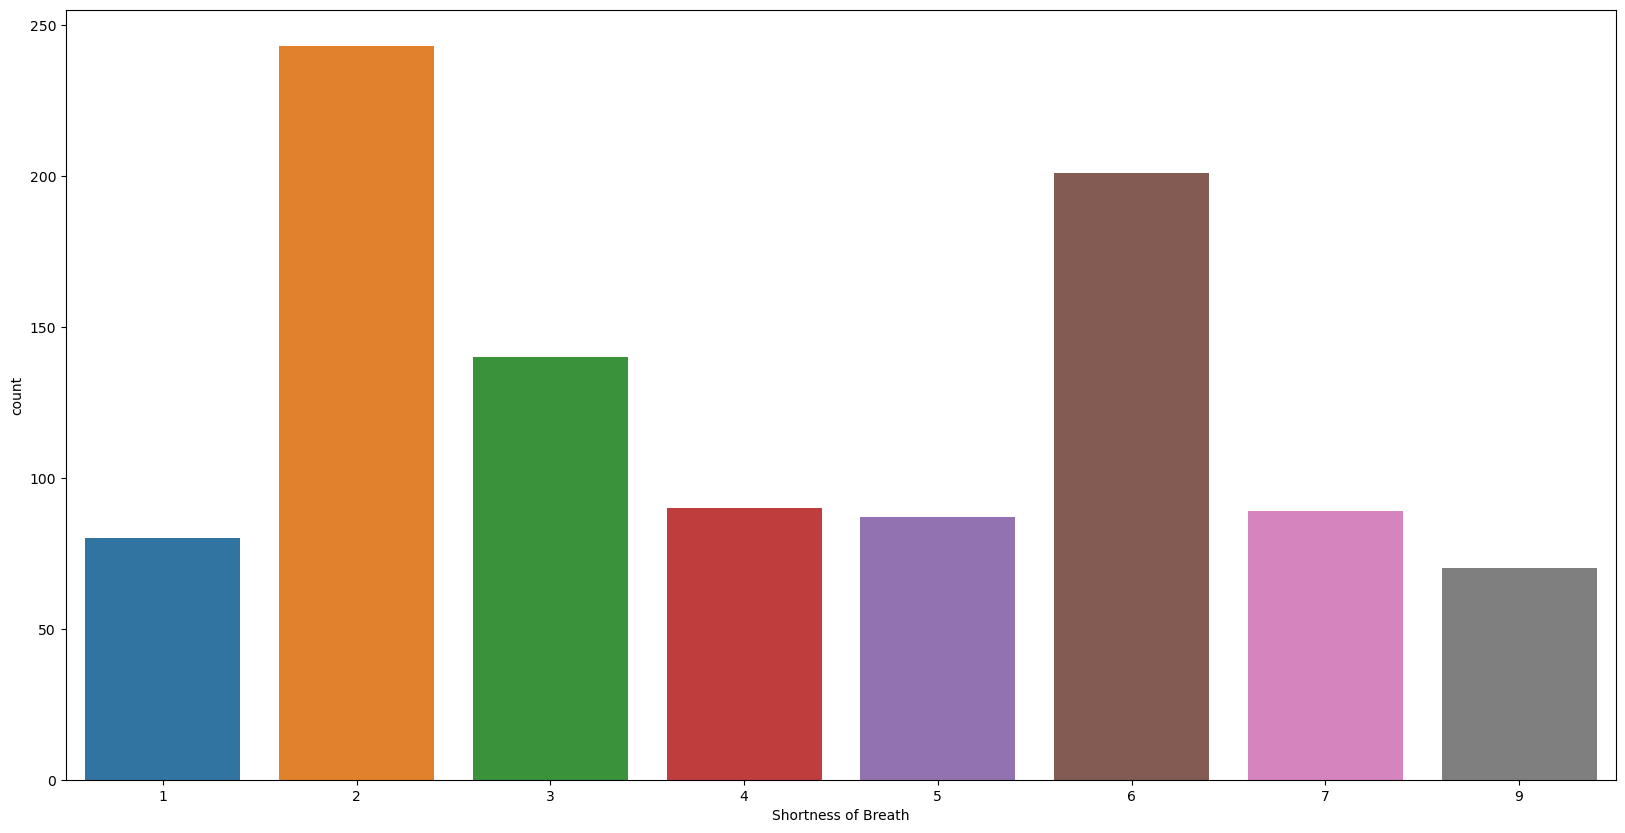

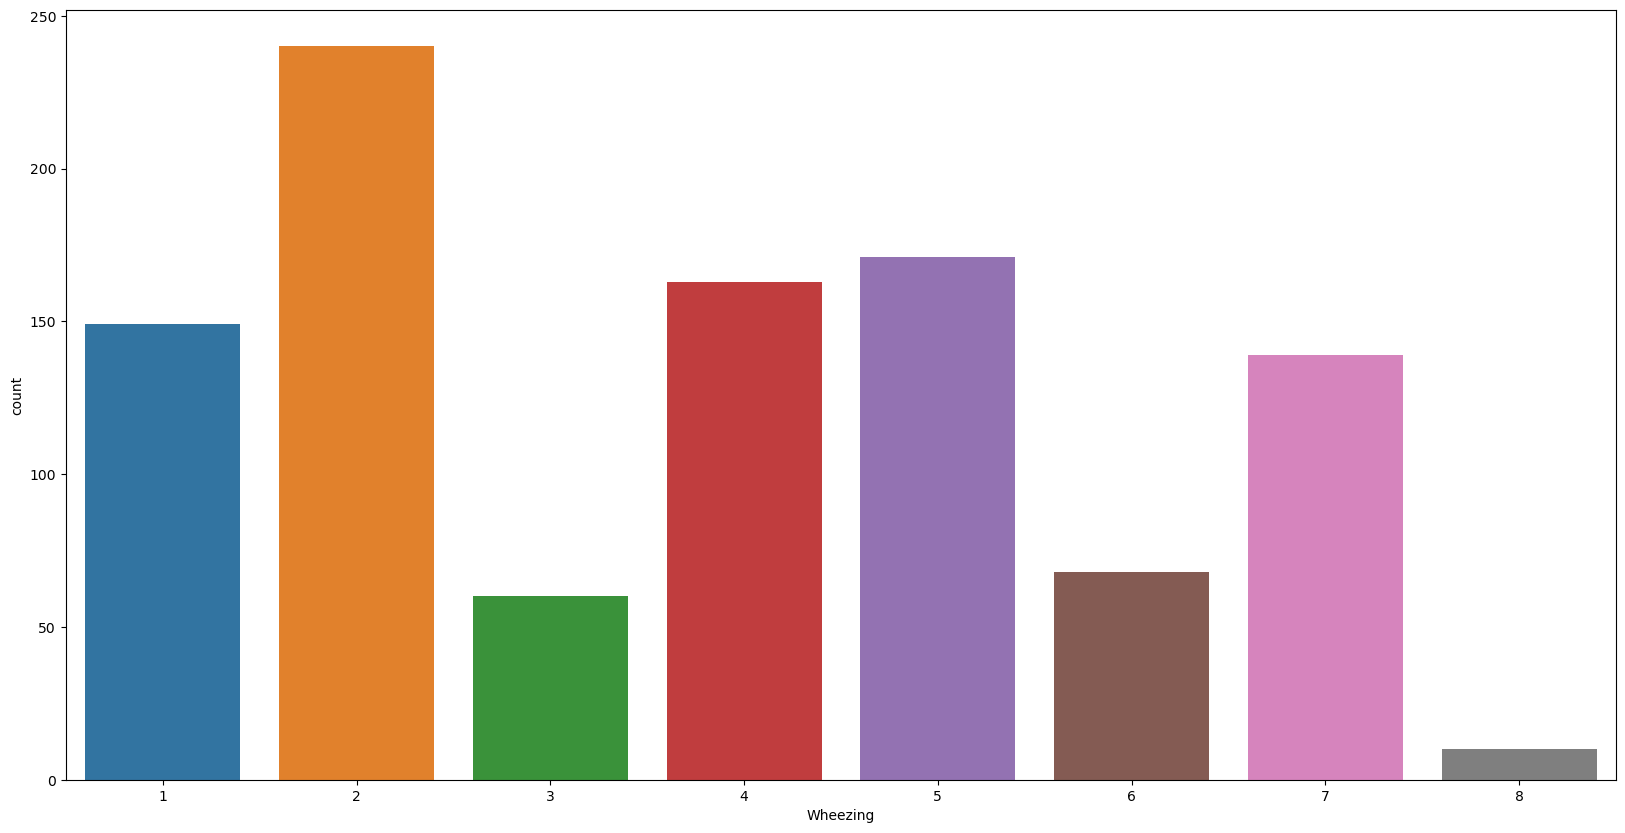

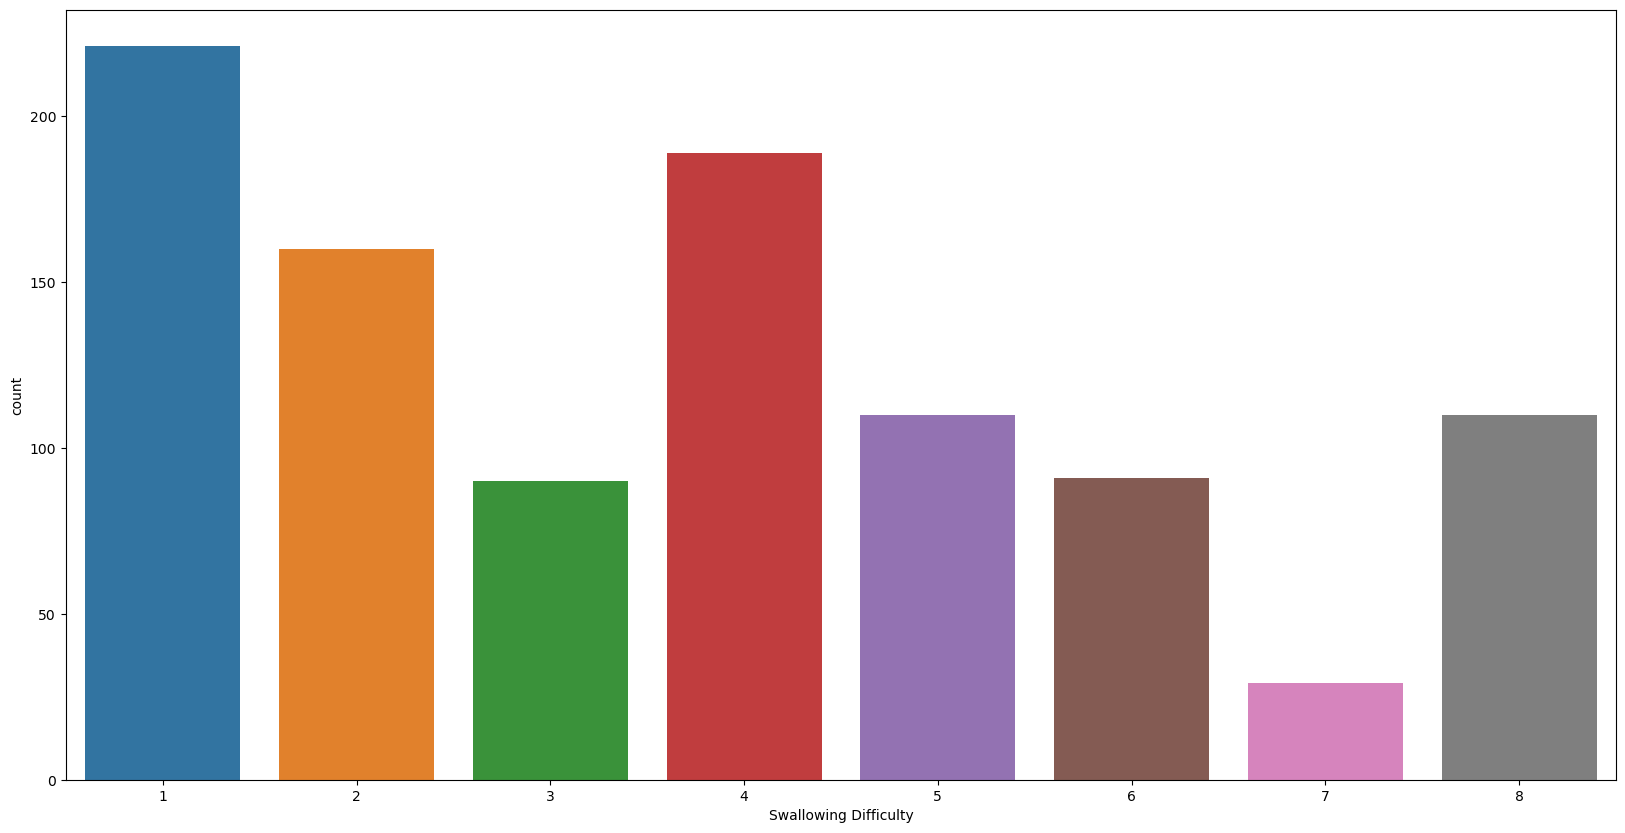

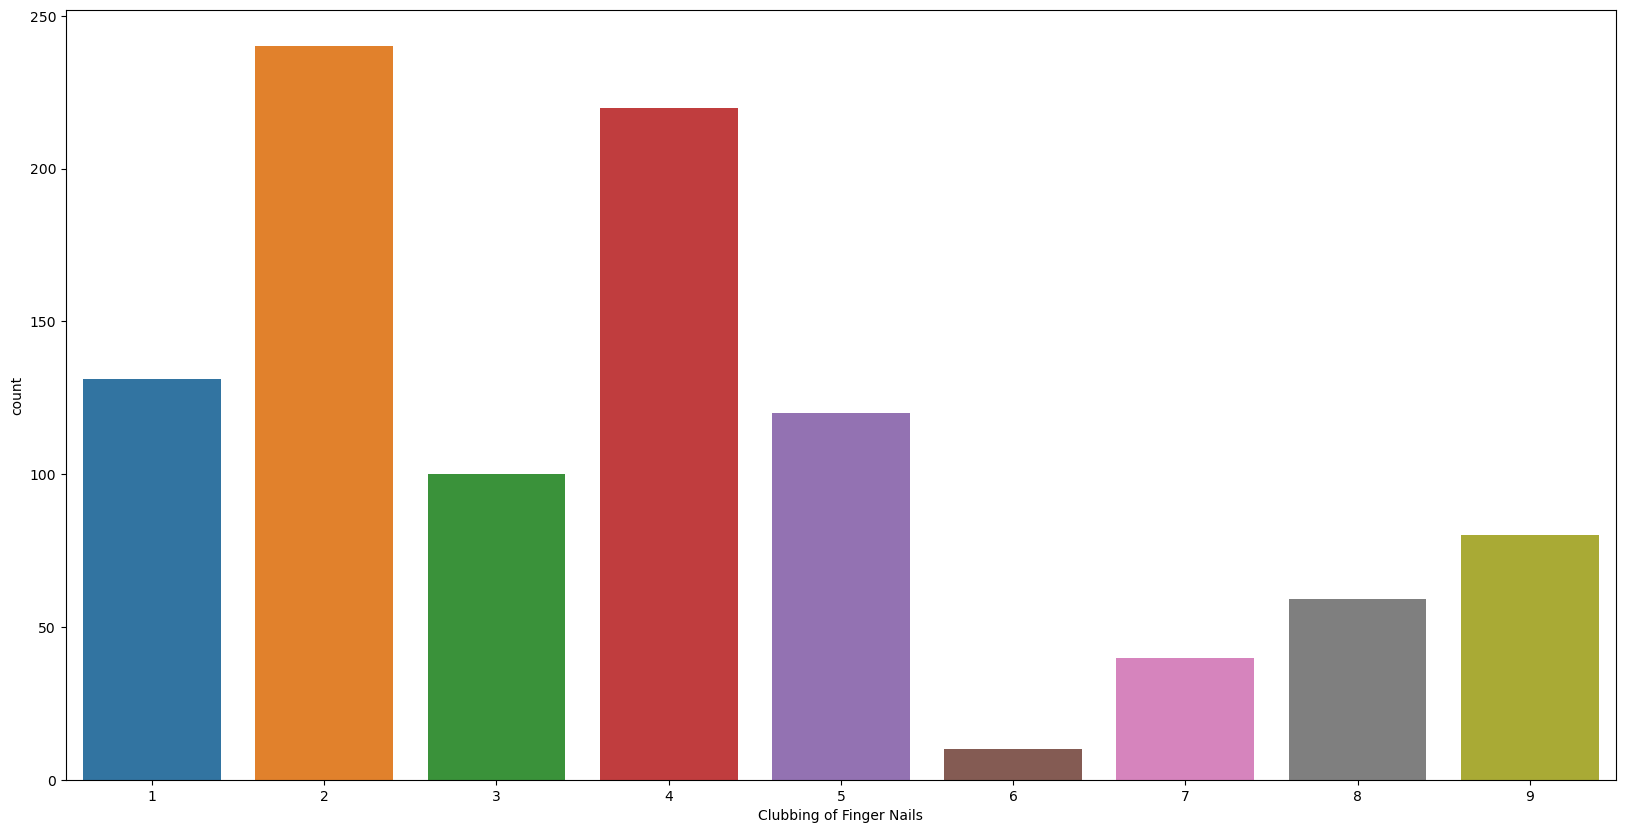

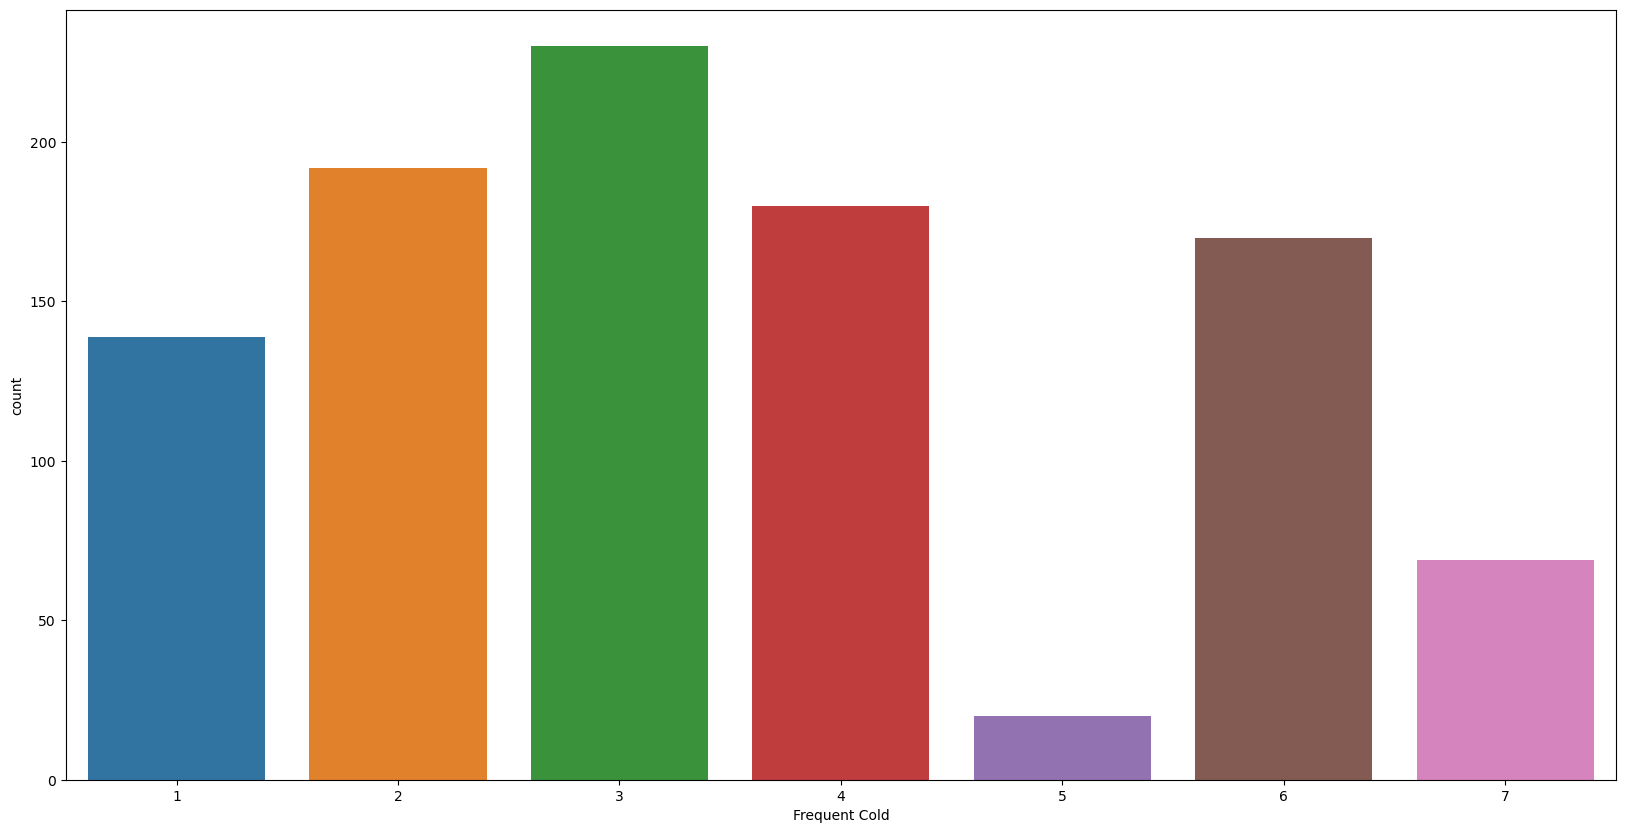

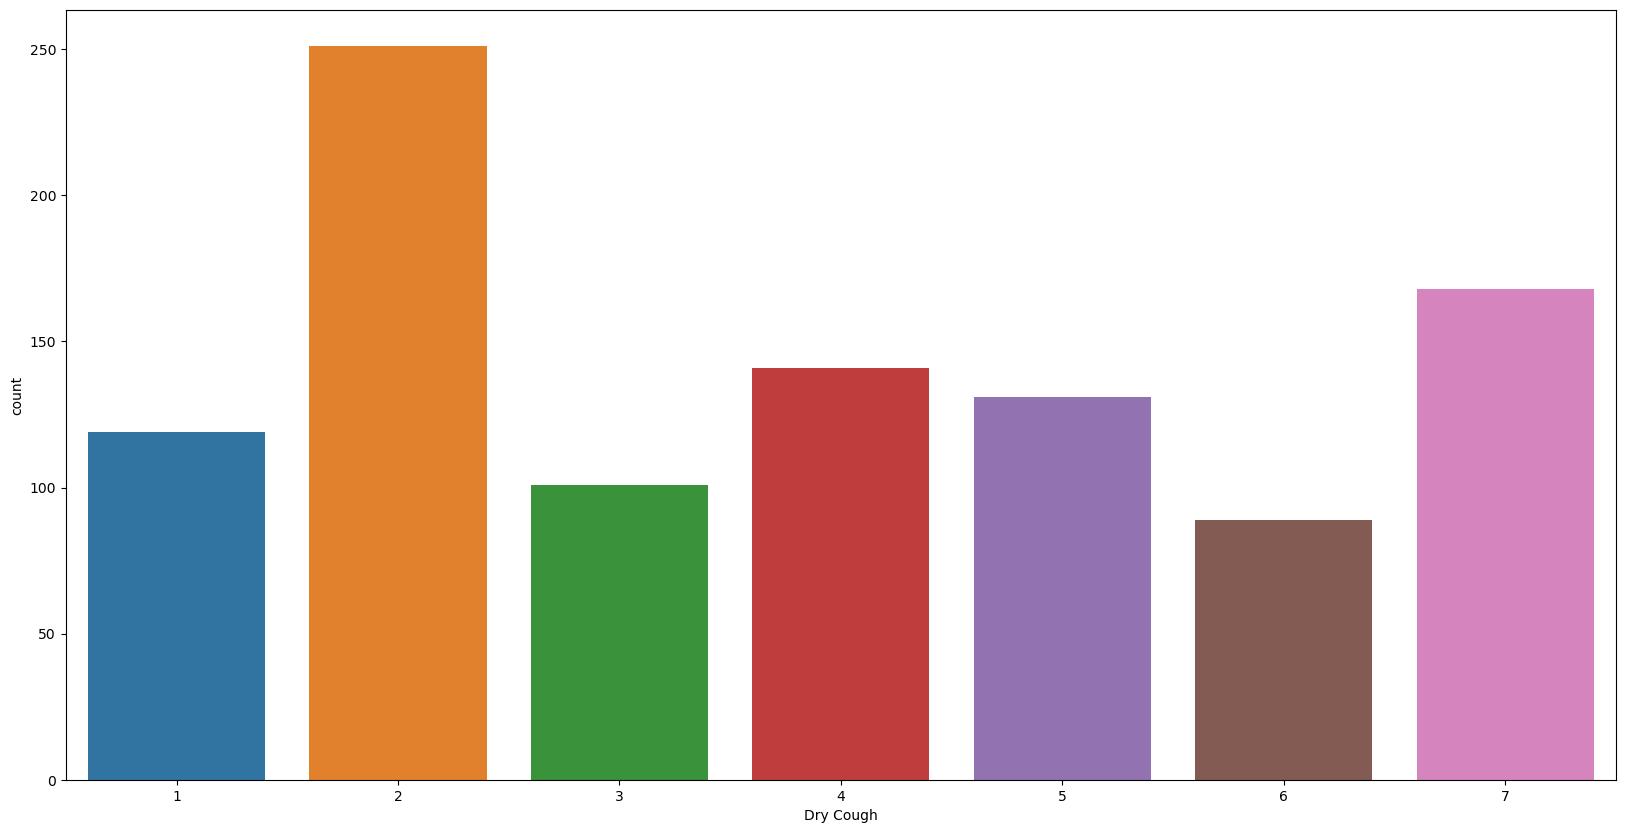

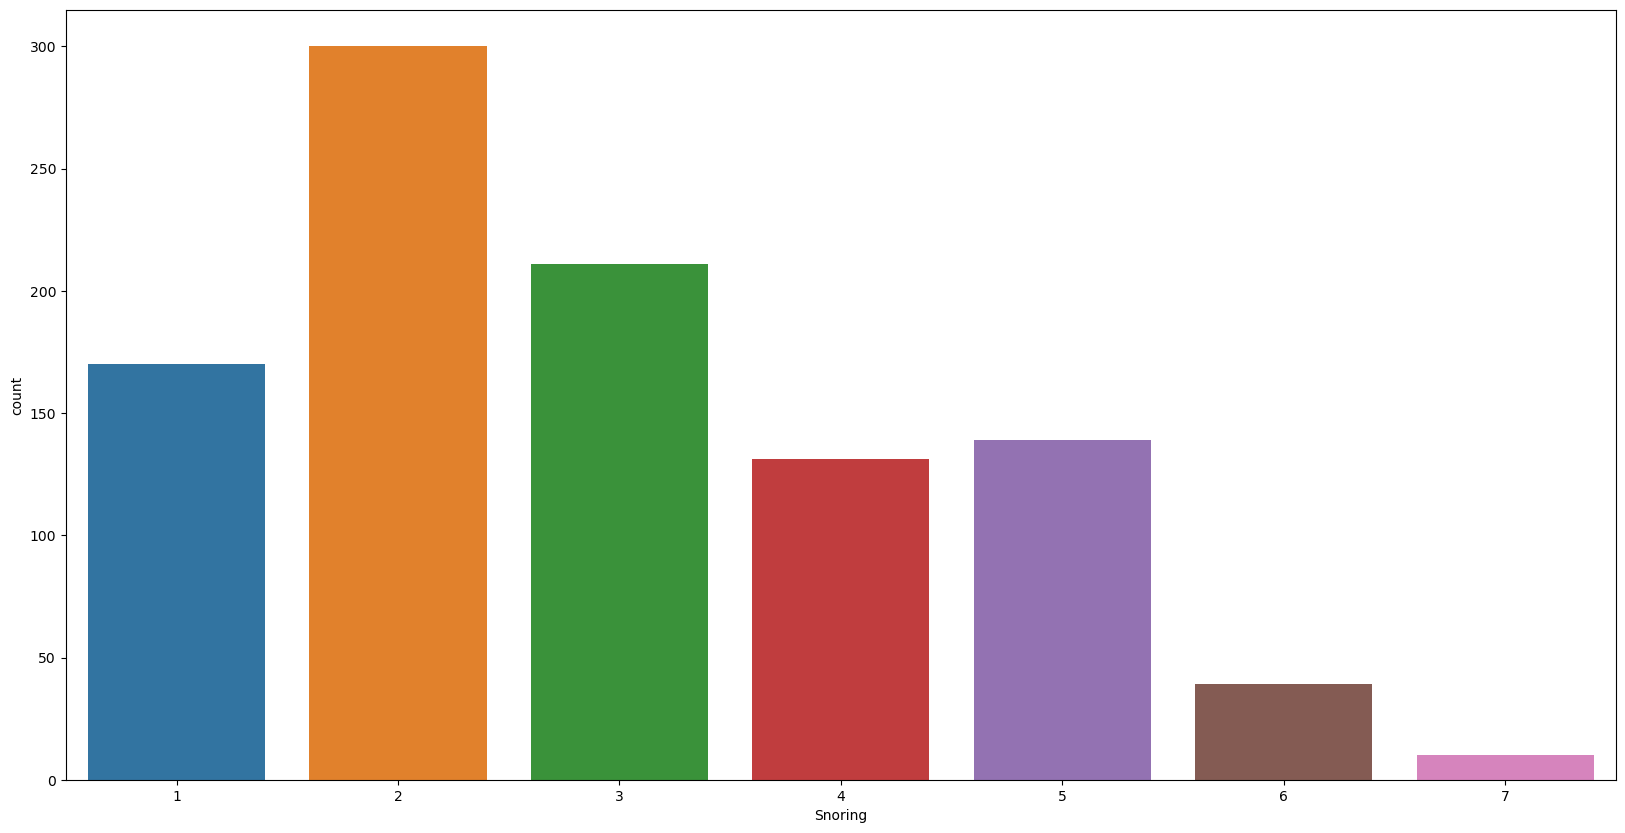

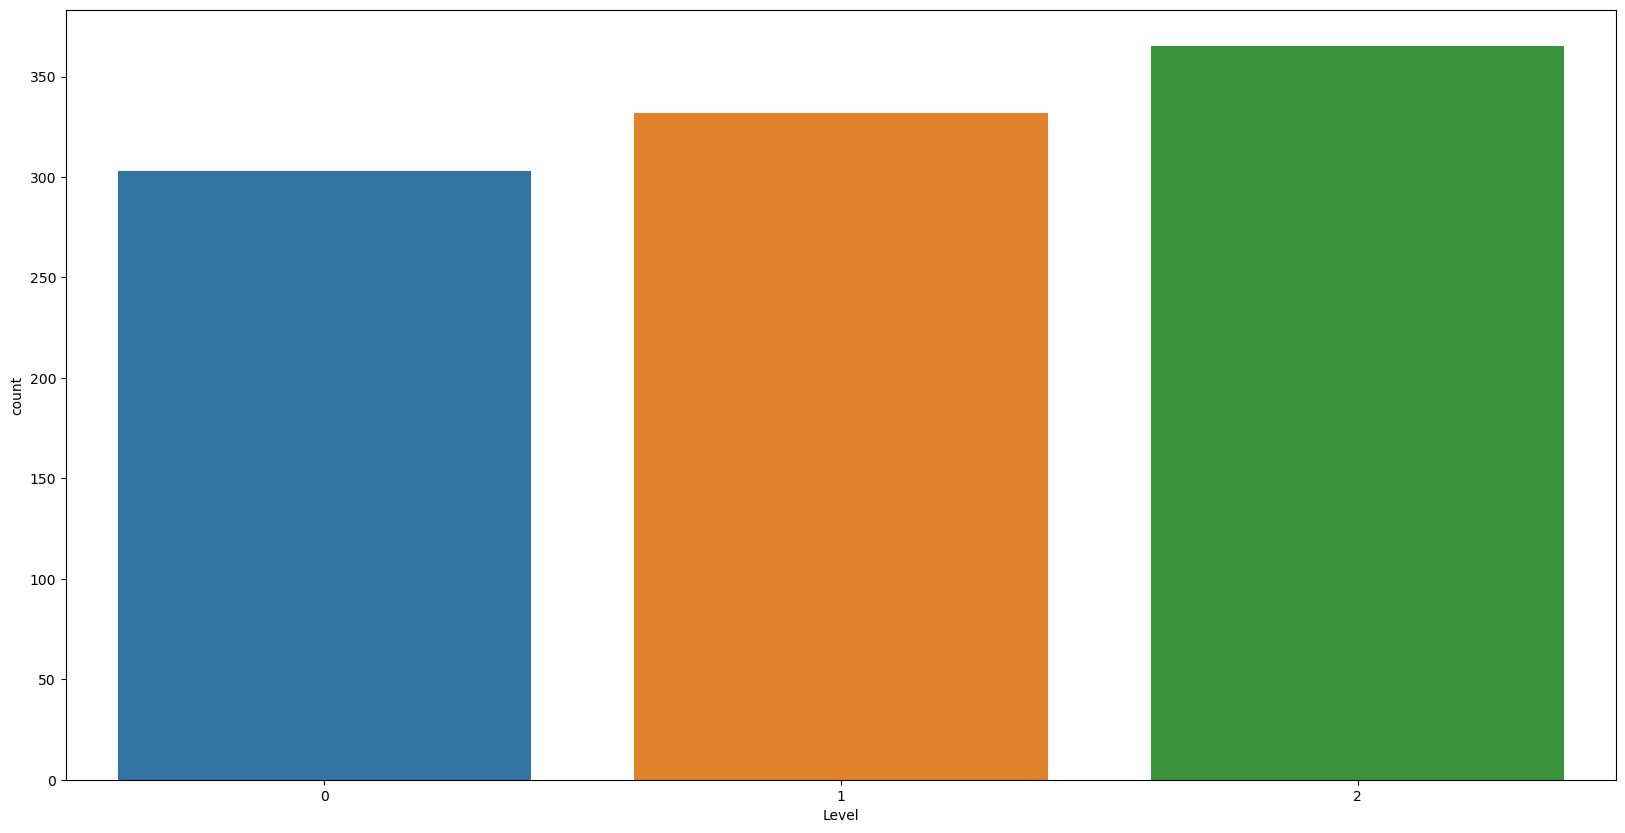

In [867]:
for i in data.columns:
    plt.figure(figsize=(20,10))
    sns.countplot(data, x=i)
    plt.show

In [868]:
data.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

<AxesSubplot: xlabel='Smoking', ylabel='Shortness of Breath'>

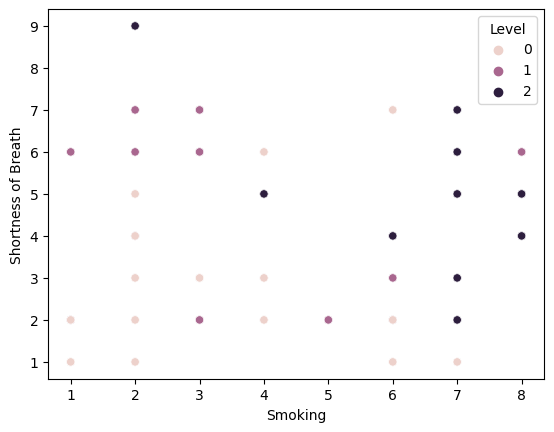

In [869]:
sns.scatterplot(data=data,x='Smoking',y='Shortness of Breath',hue='Level')

In [870]:
def biplot(dfScores: pd.DataFrame, dfLoadings: pd.DataFrame) -> None:
    
    #create figure and axis objects
    fig,ax = plt.subplots(figsize=(15,8))
    
    #make a scores plot
    ax.scatter(dfScores.PC1.values,dfScores.PC2.values, color='b')
    #set x-axis label
    ax.set_xlabel("PC1",fontsize=10)
    #set y-axis label
    ax.set_ylabel("PC2",fontsize=10)
    
    #create a second set of axes
    ax2 = ax.twinx().twiny()
    
    #setup font dictionary
    font = {'color':  'g',
            'weight': 'bold',
            'size': 15,
            }
    
    #make a loadings plot
    for col in dfLoadings.columns.values:
        # where do our loading vectors end?
        tipx = dfLoadings.loc['PC1',col]
        tipy = dfLoadings.loc['PC2',col]
        #draw the vector, and write label text for col
        ax2.arrow(0, 0, tipx, tipy, color = 'r', alpha = 0.5)
        ax2.text(tipx*1.05, tipy*1.05, col, fontdict = font, ha = 'center', va = 'center')
    
    #align x = 0 of ax and ax2 with the center of figure
    mpl_axes_aligner.align.xaxes(ax, 0, ax2, 0, 0.5)
    #align y = 0 of ax and ax2 with the center of figure
    mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.5)
    
    #show plot
    plt.show()


In [871]:
X = data.drop(['Level'], axis=1)
y = target = df['Level'].to_numpy()

#standardise the predictors
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
#apply PCA & package results in a dataframe
pca = PCA(n_components=2)
scores = pca.fit_transform(X_standard)

In [872]:
# indique le % d'info gardées par PC1 et PC2
# col 1 = % PC1
# col 2 = % PC2
pca.explained_variance_ratio_

array([0.39580565, 0.11740061])

In [873]:
dfScores = pd.DataFrame(scores,columns=['PC'+str(i) for i in range(1,scores.shape[1]+1)])
dfLoadings = pd.DataFrame(pca.components_,columns=X.columns,index=dfScores.columns)

In [874]:
dfLoadings

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
PC1,0.030093,-0.084953,0.253335,0.297312,0.282245,0.295190,0.301793,0.272143,0.275313,0.282034,...,0.267513,0.153995,0.088937,0.155744,0.065519,0.023967,0.099951,0.088367,0.104035,0.041344
PC2,0.020889,0.033645,-0.004729,0.022577,0.114407,-0.015462,0.009324,-0.109722,-0.111259,0.008854,...,-0.117405,0.175163,0.427525,0.432118,0.212453,-0.107812,0.374492,0.258668,0.297273,-0.085409


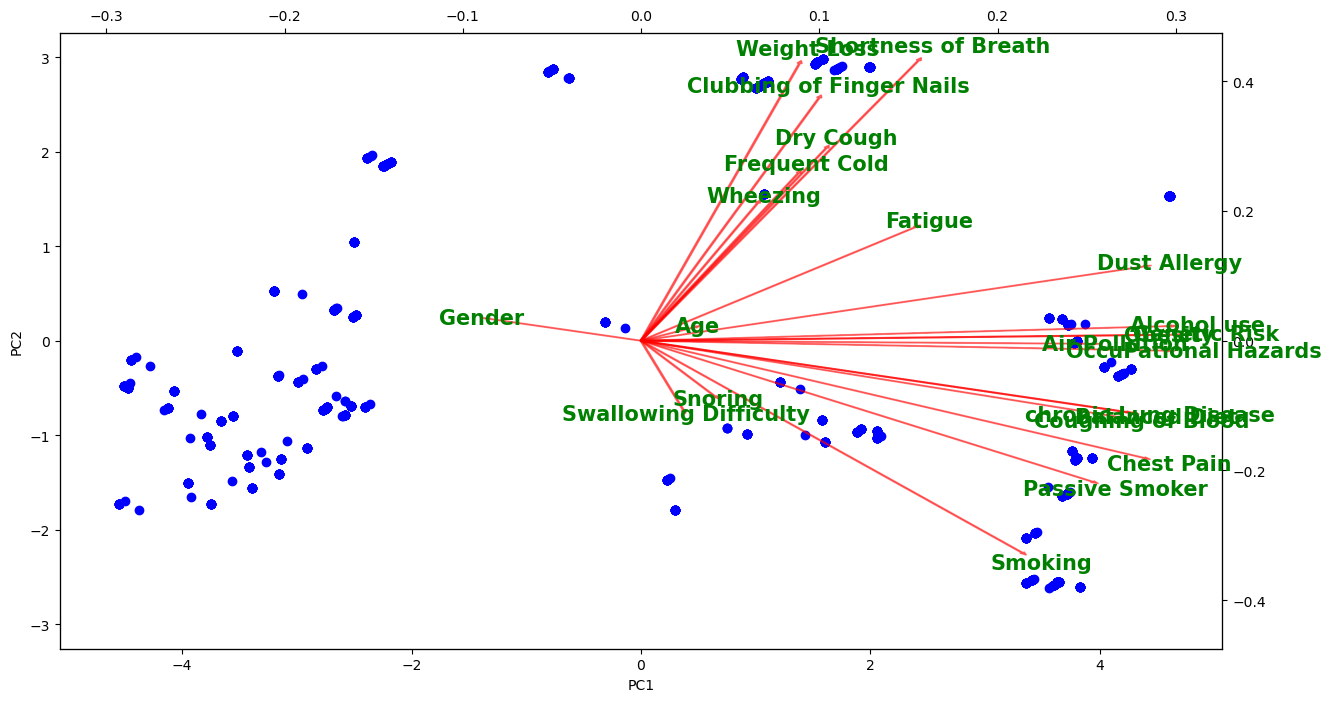

In [875]:
#produce biplot
biplot(dfScores, dfLoadings)

## Avec réduction dimension

In [876]:
X = data.drop(['Level','Coughing of Blood','OccuPational Hazards','Air Pollution','chronic Lung Disease','Chest Pain','Shortness of Breath','Weight Loss','Clubbing of Finger Nails','Gender','Swallowing Difficulty'], axis=1)
y = target = df['Level'].to_numpy()

In [877]:
X.shape

(1000, 13)

In [878]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [879]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)

GaussianNB()

In [880]:
pred=bayes.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.92